In [1]:
import xarray as xr
import xesmf as xe
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import dask
import cftime
import random
import glob
import matplotlib.gridspec as gs

In [2]:
from dask.distributed import Client, LocalCluster
client = Client()
client

<Client: 'tcp://127.0.0.1:46855' processes=7 threads=14, memory=63.00 GiB>

In [3]:
#load in SST

In [4]:
ctrl_sst = xr.open_dataset("/g/data/e14/sm2435/Exps_ACCESS_initial/ctrl_sst.nc",  use_cftime=True, chunks= {"time":240})
VC_sst = xr.open_dataset("/g/data/e14/sm2435/Exps_ACCESS_initial/VAR_PACE_sst.nc",  use_cftime=True, chunks= {"time":240})
ctrl_sst = ctrl_sst.sst.compute()
VC_sst = VC_sst.sst.compute()

In [5]:
ctrl_z20 = xr.open_dataset("/g/data/e14/sm2435/Exps_ACCESS_initial/ctrl_z20.nc",  use_cftime=True, chunks= {"time":240})
VC_z20 = xr.open_dataset("/g/data/e14/sm2435/Exps_ACCESS_initial/Var_pace_z20.nc",  use_cftime=True, chunks= {"time":240})
ctrl_z20 = ctrl_z20.z20.compute()
VC_z20 = VC_z20.z20.compute()

In [6]:
OC_sst = xr.open_dataset("/g/data/e14/sm2435/Exps_ACCESS_initial/OC_sst.nc",  use_cftime=True, chunks= {"time":240})
MC_sst = xr.open_dataset("/g/data/e14/sm2435/Exps_ACCESS_initial/MC_sst.nc",  use_cftime=True, chunks= {"time":240})
OC_sst = OC_sst.sst.compute()
MC_sst = MC_sst.sst.compute()

In [7]:
OC_z20 = xr.open_dataset("/g/data/e14/sm2435/Exps_ACCESS_initial/obs_pace_z20.nc",  use_cftime=True, chunks= {"time":240})
MC_z20 = xr.open_dataset("/g/data/e14/sm2435/Exps_ACCESS_initial/mod_pace_z20.nc",  use_cftime=True, chunks= {"time":240})
OC_z20 = OC_z20.z20.compute()
MC_z20 = MC_z20.z20.compute()

In [ ]:
#load in Qnet data
ctrl_q = xr.open_dataset("/g/data/e14/sm2435/Exps_ACCESS_initial/ctrl_qnet.nc",  use_cftime=True, chunks= {"time":240})
OC_q = xr.open_dataset("/g/data/e14/sm2435/Exps_ACCESS_initial/OC_qnet.nc",  use_cftime=True, chunks= {"time":240})
MC_q = xr.open_dataset("/g/data/e14/sm2435/Exps_ACCESS_initial/MC_qnet.nc",  use_cftime=True, chunks= {"time":240})
VC_q = xr.open_dataset("/g/data/e14/sm2435/Exps_ACCESS_initial/VC_qnet.nc",  use_cftime=True, chunks= {"time":240})


In [ ]:
ctrl_q = ctrl_q.qnet.compute()
OC_q = OC_q.qnet.compute()
MC_q = MC_q.qnet.compute()
VC_q = VC_q.qnet.compute()

In [ ]:
ctrl_q.attrs = {'long_name': 'surface heat flux seen by ocean (after restoring',
             'units': 'm',
             'valid_range': [-1300., 1300.],
             'cell_methods': 'time: mean',
             'time_avg_info': 'average_T1,average_T2,average_DT',
             'standard_name': 'qnet'}

In [ ]:
OC_q.attrs = {'long_name': 'surface heat flux seen by ocean (after restoring',
             'units': 'm',
             'valid_range': [-1300., 1300.],
             'cell_methods': 'time: mean',
             'time_avg_info': 'average_T1,average_T2,average_DT',
             'standard_name': 'qnet'}

In [ ]:
MC_q.attrs = {'long_name': 'surface heat flux seen by ocean (after restoring',
             'units': 'm',
             'valid_range': [-1300., 1300.],
             'cell_methods': 'time: mean',
             'time_avg_info': 'average_T1,average_T2,average_DT',
             'standard_name': 'qnet'}

In [ ]:
VC_q.attrs = {'long_name': 'surface heat flux seen by ocean (after restoring',
             'units': 'm',
             'valid_range': [-1300., 1300.],
             'cell_methods': 'time: mean',
             'time_avg_info': 'average_T1,average_T2,average_DT',
             'standard_name': 'qnet'}

In [8]:
OC_z20.attrs = {'long_name': 'depth of 20oC isotherm',
             'units': 'm',
             'valid_range': [0., 500.],
             'cell_methods': 'time: mean',
             'time_avg_info': 'average_T1,average_T2,average_DT',
             'standard_name': 'z20_depth'}

In [9]:
VC_z20.attrs = {'long_name': 'depth of 20oC isotherm',
             'units': 'm',
             'valid_range': [0., 500.],
             'cell_methods': 'time: mean',
             'time_avg_info': 'average_T1,average_T2,average_DT',
             'standard_name': 'z20_depth'}

In [10]:
ctrl_z20.attrs = {'long_name': 'depth of 20oC isotherm',
             'units': 'm',
             'valid_range': [0., 500.],
             'cell_methods': 'time: mean',
             'time_avg_info': 'average_T1,average_T2,average_DT',
             'standard_name': 'z20_depth'}

In [11]:
MC_z20.attrs = {'long_name': 'depth of 20oC isotherm',
             'units': 'm',
             'valid_range': [0., 500.],
             'cell_methods': 'time: mean',
             'time_avg_info': 'average_T1,average_T2,average_DT',
             'standard_name': 'z20_depth'}

In [12]:
#load in wind stress for u

In [13]:
ctrl_u = xr.open_dataset("/g/data/e14/sm2435/Exps_ACCESS_initial/ctrl_uwnd.nc",  use_cftime=True, chunks= {"time":240})
VC_u = xr.open_dataset("/g/data/e14/sm2435/Exps_ACCESS_initial/var_uwnd.nc",  use_cftime=True, chunks= {"time":240})
ctrl_u = ctrl_u.tauu.compute()
VC_u = VC_u.tauu.compute()

In [14]:
OC_u = xr.open_dataset("/g/data/e14/sm2435/Exps_ACCESS_initial/ob_uwnd.nc",  use_cftime=True, chunks= {"time":240})
MC_u = xr.open_dataset("/g/data/e14/sm2435/Exps_ACCESS_initial/mod_uwnd.nc",  use_cftime=True, chunks= {"time":240})
OC_u = OC_u.tauu.compute()
MC_u = MC_u.tauu.compute()

In [15]:
MC_sst = MC_sst.sel(time = slice("0951-01-01", "1100-12-31"))
MC_u = MC_u.sel(time = slice("0951-01-01", "1100-12-31"))
MC_z20 = MC_z20.sel(time = slice("0951-01-01", "1100-12-31"))
MC_q = MC_q.sel(time = slice("0951-01-01", "1100-12-31"))

In [16]:
OC_sst = OC_sst.sel(time = slice("0951-01-01", "1000-12-31"))
OC_u = OC_u.sel(time = slice("0951-01-01", "1000-12-31"))
OC_z20 = OC_z20.sel(time = slice("0951-01-01", "1000-12-31"))
OC_q = OC_q.sel(time = slice("0951-01-01", "1000-12-31"))

In [17]:
ctrl_sst = ctrl_sst.sel(time = slice("0951-01-01", "1150-12-31"))
ctrl_u = ctrl_u.sel(time = slice("0951-01-01", "1150-12-31"))
ctrl_z20 = ctrl_z20.sel(time = slice("0951-01-01", "1150-12-31"))
ctrl_q = ctrl_q.sel(time = slice("0951-01-01", "1150-12-31"))

In [18]:
VC_sst = VC_sst.sel(time = slice("0951-01-01", "1000-12-31"))
VC_u = VC_u.sel(time = slice("0951-01-01", "1000-12-31"))
VC_q = VC_q.sel(time = slice("0951-01-01", "1000-12-31"))

In [19]:
#move the u wind stress onto the t-cell

In [20]:
import xgcm

In [21]:
ds3 = xr.merge([OC_sst, OC_u])
ds4 = xr.merge([MC_sst, MC_u])
ds3 = ds3.drop(['geolon_t', 'geolat_t'])
ds4 = ds4.drop(['geolon_t', 'geolat_t'])

In [22]:
ds1 = xr.merge([ctrl_sst, ctrl_u])

In [23]:
ds1 = ds1.drop(['geolon_t', 'geolat_t'])

In [24]:
grid1 = xgcm.Grid(
    ds1,
    coords={"X": {"center": "xt_ocean", "right": "xu_ocean"},
            "Y": {"center": "yt_ocean", "right": "yu_ocean"}}
)


In [25]:
ctrl_u_ = grid1.interp(ds1.tauu, axis = ["X", "Y"], to="center")

In [26]:
ctrl_u_.attrs = ctrl_u.attrs

In [27]:
ds2 = xr.merge([VC_sst, VC_u])

In [28]:
ds2 = ds2.drop(['geolon_t', 'geolat_t'])

In [29]:
grid2 = xgcm.Grid(
    ds2,
    coords={"X": {"center": "xt_ocean", "right": "xu_ocean"},
            "Y": {"center": "yt_ocean", "right": "yu_ocean"}}
)


In [30]:
VC_u_ = grid2.interp(ds2.tauu, axis = ["X", "Y"], to="center")

In [31]:
VC_u_.attrs = VC_u.attrs

In [32]:
grid3 = xgcm.Grid(
    ds3,
    coords={"X": {"center": "xt_ocean", "right": "xu_ocean"},
            "Y": {"center": "yt_ocean", "right": "yu_ocean"}}
)
OC_u_ = grid3.interp(ds3.tauu, axis = ["X", "Y"], to="center")
OC_u_.attrs = OC_u.attrs

In [33]:
grid4 = xgcm.Grid(
    ds4,
    coords={"X": {"center": "xt_ocean", "right": "xu_ocean"},
            "Y": {"center": "yt_ocean", "right": "yu_ocean"}}
)
MC_u_ = grid4.interp(ds4.tauu, axis = ["X", "Y"], to="center")
MC_u_.attrs = MC_u.attrs

In [34]:
def roll_lon(df):
    df.coords['xt_ocean'] = (df.coords['xt_ocean']) % 360# - 180
    df = df.sortby(df.xt_ocean)
    return df

In [35]:
ctrl_sst = roll_lon(ctrl_sst)
ctrl_z20 = roll_lon(ctrl_z20)
ctrl_u_ = roll_lon(ctrl_u_)

VC_sst = roll_lon(VC_sst)
VC_z20 = roll_lon(VC_z20)
VC_u_ = roll_lon(VC_u_)

In [36]:
OC_sst = roll_lon(OC_sst)
OC_z20 = roll_lon(OC_z20)
OC_u_ = roll_lon(OC_u_)
MC_sst = roll_lon(MC_sst)
MC_z20 = roll_lon(MC_z20)
MC_u_ = roll_lon(MC_u_)

In [ ]:
MC_q = roll_lon(MC_q)
OC_q = roll_lon(OC_q)
VC_q = roll_lon(VC_q)
ctrl_q = roll_lon(ctrl_q)

In [37]:
import numpy as np
from scipy.stats import t

In [38]:
def linear_trend(x, y):
    # Check for NaN values and skip them
    valid = ~np.isnan(x) & ~np.isnan(y)
    if valid.sum() < 2:
        return np.nan
    else:
        pf = np.polyfit(x[valid], y[valid], 1)
        return pf[0]

In [55]:
def regress(var1, var2):
    slope = xr.apply_ufunc(linear_trend,
                        var1, var2,
                        vectorize=True,
                        dask = 'parallelized',
                        input_core_dims=[['time'], ['time']],
                        )
    return slope

In [40]:
def regress_season(var1, var2, season):
    var1 = var1.resample(time='QS-DEC').mean(dim="time")
    #select seasons into a timeseries
    var1 = var1.groupby('time.season')[season]
    var2 = var2.resample(time='QS-DEC').mean(dim="time")
    #select seasons into a timeseries
    var2 = var2.groupby('time.season')[season]
    slope = xr.apply_ufunc(linear_trend,
                        var1, var2,
                        vectorize=True,
                        dask = 'parallelized',
                        input_core_dims=[['time'], ['time']]
                        )
    slope = slope.expand_dims(season=[season])
    slope.attrs['standard_name'] = "regression between "+var1.attrs["standard_name"]+" and "+var2.attrs["standard_name"]
    slope.attrs['units'] = var1.attrs["units"]+" / "+var2.attrs["units"]
    return slope

In [41]:
#create seasonal timeseries of the regressions

In [42]:
def seasonal_regressions(var1, var2):
    ds_MAM = regress_season(var1, var2, "MAM")
    ds_JJA = regress_season(var1, var2, "JJA")
    ds_SON = regress_season(var1, var2, "SON")
    ds_DJF = regress_season(var1, var2, "DJF")
    ds = xr.concat([ds_MAM, ds_JJA, ds_SON, ds_DJF], dim = "season")
    return ds

In [43]:
def linear_trend_p_vals(x, y):
    # Check for NaN values and skip them
    valid = ~np.isnan(x) & ~np.isnan(y)
    if valid.sum() < 2:
        return np.nan
    else:
        # Fit a linear regression model
        pf = np.polyfit(x[valid], y[valid], 1)

        # Calculate standard errors of the coefficients
        residuals = y[valid] - np.polyval(pf, x[valid])
        mse = np.sum(residuals**2) / (len(x[valid]) - 2)  # Mean Squared Error
        se_slope = np.sqrt(mse / np.sum((x[valid] - np.mean(x[valid]))**2))

        # Calculate t-statistic for the slope
        t_statistic = pf[0] / se_slope

        # Degrees of freedom
        df = len(x[valid]) - 2

        # Two-tailed t-test for the slope
        p_value = 2 * (1 - t.cdf(abs(t_statistic), df))

        # Return the slope and its significance level
        return  p_value

In [56]:
def regress21(var1, var2):
    slope = xr.apply_ufunc(linear_trend,
                                    var1, var2,
                                    input_core_dims=[['time'], ['time']],
                                    vectorize=True,
                                    dask='parallelized',
                                    output_core_dims=[[], []],
                                    output_dtypes=[float, float]
                                    )
    # Create DataArrays for slope and p-value
    slope_da = xr.DataArray(slope, coords={'yt_ocean': var1.yt_ocean, 'xt_ocean': var1.xt_ocean}, dims=['yt_ocean', 'xt_ocean'])
    return slope_da
# Example usage


In [45]:
#### get only pIOD years and nIOD years

In [46]:
def ssta(DS):
    clim = DS.groupby('time.month').mean('time')
    ssta = DS.groupby('time.month') - clim
    return ssta
def dmi(DS):
    WTIO = ssta(DS).sel(yt_ocean=slice(-10, 10),xt_ocean=slice(50, 70)).mean(['yt_ocean', 'xt_ocean'])
    SETIO = ssta(DS).sel(yt_ocean=slice(-10, 0),xt_ocean=slice(90, 110)).mean(['yt_ocean', 'xt_ocean'])
    return (WTIO-SETIO).drop('month')

In [47]:
def IOD_events(ds):
    #get the DMI timeseries in seaaons starting D(0)JF(1) etc
    QS = dmi(ds).resample(time='QS-DEC').mean(dim="time")
    #select SON seasons into a timeseries
    SON = QS.groupby('time.season')["SON"]
    #now use this to select all events and create da's of niod and piod event values
    lower,upper = SON.quantile([0.25, 0.75])
    nIOD = SON.where(SON <= lower.values).dropna(dim = "time")
    pIOD = SON.where(SON > upper.values).dropna(dim = "time")
    return nIOD, pIOD
def get_IOD_times(ds_sst, ds_var):
    nIOD, pIOD = IOD_events(ds_sst)
    #now get the times where the variable is in SON
    SON_var = ds_var.resample(time='QS-DEC').mean(dim="time").groupby('time.season')["SON"]
    #Now use nIOd and PIOD to get the times that we want
    nIOD_var = SON_var.where(SON_var.time == nIOD.time)#.dropna(dim = "time")
    pIOD_var = SON_var.where(SON_var.time == pIOD.time)#.dropna(dim = "time")
    return nIOD_var, pIOD_var

In [48]:
ctrl_sst_p, ctrl_sst_n = get_IOD_times(ctrl_sst, ctrl_sst)
OC_sst_p, OC_sst_n = get_IOD_times(OC_sst, OC_sst)
MC_sst_p, MC_sst_n = get_IOD_times(MC_sst, MC_sst)
VC_sst_p, VC_sst_n = get_IOD_times(VC_sst, VC_sst)


In [49]:
ctrl_z20_p, ctrl_z20_n = get_IOD_times(ctrl_sst, ctrl_z20)
OC_z20_p, OC_z20_n = get_IOD_times(OC_sst, OC_z20)
MC_z20_p, MC_z20_n = get_IOD_times(MC_sst, MC_z20)
VC_z20_p, VC_z20_n = get_IOD_times(VC_sst, VC_z20)


In [50]:
ctrl_u_p, ctrl_u_n = get_IOD_times(ctrl_sst, ctrl_u_)
OC_u_p, OC_u_n = get_IOD_times(OC_sst, OC_u_)
MC_u_p, MC_u_n = get_IOD_times(MC_sst, MC_u_)
VC_u_p, VC_u_n = get_IOD_times(VC_sst, VC_u_)


In [57]:
VC_pIOD_USST = regress(OC_u_n, OC_sst_n)


In [58]:
(regress(VC_u_p, VC_sst_p) - regress(ctrl_u_p, ctrl_sst_p)).sel(xt_ocean = slice(90,100), yt_ocean = slice(-10,0)).mean(['xt_ocean', 'yt_ocean'])

<xarray.DataArray ()>
array(5.0887144)

In [ ]:
VC_SST_Q_r = seasonal_regressions(VC_sst, VC_q)
MC_SST_Q_r = seasonal_regressions(MC_sst, MC_q)
OC_SST_Q_r = seasonal_regressions(OC_sst, OC_q)
ctrl_SST_Q_r = seasonal_regressions(ctrl_sst, ctrl_q)


In [59]:
VC_U_Z20_r = seasonal_regressions(VC_u_, VC_z20)
ctrl_U_Z20_r = seasonal_regressions(ctrl_u_, ctrl_z20)
OC_U_Z20_r = seasonal_regressions(OC_u_, OC_z20)
MC_U_Z20_r = seasonal_regressions(MC_u_, MC_z20)


In [60]:
VC_Z20_SST_r = seasonal_regressions(VC_z20, VC_sst)
ctrl_Z20_SST_r = seasonal_regressions(ctrl_z20, ctrl_sst)
OC_Z20_SST_r = seasonal_regressions(OC_z20, OC_sst)
MC_Z20_SST_r = seasonal_regressions(MC_z20, MC_sst)


In [61]:
VC_U_SST_r = seasonal_regressions(VC_u_, VC_sst)
ctrl_U_SST_r = seasonal_regressions(ctrl_u_, ctrl_sst)
OC_U_SST_r = seasonal_regressions(OC_u_, OC_sst)
MC_U_SST_r = seasonal_regressions(MC_u_, MC_sst)


In [62]:
def get_region1(DS, lat, lat_r, lon, lon_r):
    return DS.sel(yt_ocean=slice(lat, lat_r),xt_ocean=slice(lon, lon_r))

In [63]:
def get_region(DS, lat, lat_r, lon, lon_r):
    return DS.sel(yt_ocean=slice(lat, lat_r),xt_ocean=slice(lon, lon_r)).mean(['yt_ocean', 'xt_ocean'])

In [64]:
import pandas as pd

In [65]:
#create fucntion that avgs regression for differnet vars and puts them in dataframe

In [66]:
def get_regr_avg_U_sst(lat, lat_r, lon, lon_r):
    ctrl_ = get_region(ctrl_U_SST_r, lat, lat_r, lon, lon_r).to_dataframe(name="CTRL")
    VC_ = get_region(VC_U_SST_r, lat, lat_r, lon, lon_r).to_dataframe(name="ENSO no bias")
    OC_ = get_region(OC_U_SST_r, lat, lat_r, lon, lon_r).to_dataframe(name="no ENSO no bias")
    MC_ = get_region(MC_U_SST_r, lat, lat_r, lon, lon_r).to_dataframe(name="no ENSO")
    return pd.concat([ctrl_, VC_, OC_, MC_], axis = 1)            

In [67]:
def get_regr_avg_U_z20(lat, lat_r, lon, lon_r):
    ctrl_ = get_region(ctrl_U_Z20_r, lat, lat_r, lon, lon_r).to_dataframe(name="CTRL")
    VC_ = get_region(VC_U_Z20_r, lat, lat_r, lon, lon_r).to_dataframe(name="ENSO no bias")
    OC_ = get_region(OC_U_Z20_r, lat, lat_r, lon, lon_r).to_dataframe(name="no ENSO no bias")
    MC_ = get_region(MC_U_Z20_r, lat, lat_r, lon, lon_r).to_dataframe(name="no ENSO")
    return pd.concat([ctrl_, VC_, OC_, MC_], axis = 1)            

In [68]:
def get_regr_avg_z20_sst(lat, lat_r, lon, lon_r):
    ctrl_ = get_region(ctrl_Z20_SST_r, lat, lat_r, lon, lon_r).to_dataframe(name="CTRL")
    VC_ = get_region(VC_Z20_SST_r, lat, lat_r, lon, lon_r).to_dataframe(name="ENSO no bias")
    OC_ = get_region(OC_Z20_SST_r, lat, lat_r, lon, lon_r).to_dataframe(name="no ENSO no bias")
    MC_ = get_region(MC_Z20_SST_r, lat, lat_r, lon, lon_r).to_dataframe(name="no ENSO")
    return pd.concat([ctrl_, VC_, OC_, MC_], axis = 1)            

In [69]:
U_SST_eio = get_regr_avg_U_sst(-7,0,90,100)
U_Z20_eio = get_regr_avg_U_z20(-7,0,90,100)
Z20_SST_eio = get_regr_avg_z20_sst(-7,0,90,100)

In [70]:
U_SST_wion = get_regr_avg_U_sst(0,10,50,70)
U_Z20_wion = get_regr_avg_U_z20(0,10,50,70)
Z20_SST_wion = get_regr_avg_z20_sst(0,10,50,70)

In [71]:
U_SST_wios = get_regr_avg_U_sst(-10,0,50,70)
U_Z20_wios = get_regr_avg_U_z20(-10,0,50,70)
Z20_SST_wios = get_regr_avg_z20_sst(-0,10,50,70)

In [72]:
U_SST_cios = get_regr_avg_U_sst(-5,0,60,80)
U_Z20_cios = get_regr_avg_U_z20(-5,0,60,80)
Z20_SST_cios = get_regr_avg_z20_sst(-5,0,60,80)

In [73]:
U_SST_cion = get_regr_avg_U_sst(0,5,60,80)
U_Z20_cion = get_regr_avg_U_z20(0,5,60,80)
Z20_SST_cion = get_regr_avg_z20_sst(0,5,60,80)

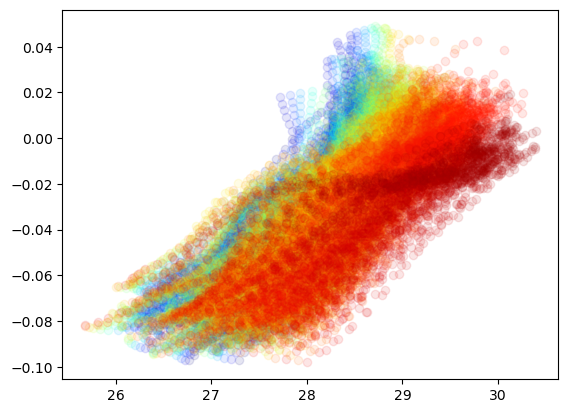

In [117]:
NUM_COLORS = 70

cm = plt.get_cmap('jet')
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
for i in range(90,100,1):
    for j in range(-7,0,1):
        ax.scatter(
            #the SST for the region
            ctrl_sst.sel(xt_ocean = slice(i,i+1), yt_ocean = slice(j,j+1)).groupby("time.season")["SON"].groupby('time.year').mean("time").values.flatten(),
            ctrl_u_.sel(xt_ocean = slice(i,i+1), yt_ocean = slice(j,j+1)).groupby("time.season")["SON"].groupby('time.year').mean("time").values.flatten(),
        alpha = 0.1)

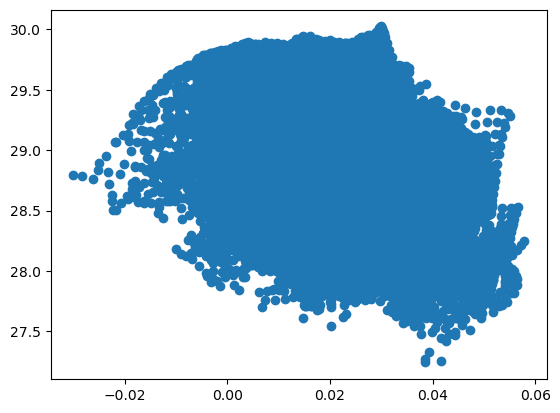

In [116]:
#make sctater plot for a region (regression wont be same but maybe simialr
plt.scatter(
    #the SST for the region
    ctrl_u_.sel(xt_ocean = slice(60,80), yt_ocean = slice(-7,0)).groupby("time.season")["MAM"].groupby('time.year').mean("time").values.flatten(),
    ctrl_sst.sel(xt_ocean = slice(60,80), yt_ocean = slice(-7,0)).groupby("time.season")["MAM"].groupby('time.year').mean("time").values.flatten())

In [ ]:
# ctrl_sst.sel(xt_ocean = slice(90,100), yt_ocean = slice(-7,0)).groupby("time.season")["SON"].groupby('time.year').mean("time")

In [74]:
U_SST_eio

CTRL  ENSO no bias  no ENSO no bias    no ENSO
season                                                     
MAM    -27.991105    -25.853822       -15.670017 -13.258585
JJA      4.270460      7.977208        14.402130   5.423516
SON     20.127565     27.005511        25.300053  20.566747
DJF     -3.485897      5.586559         4.080709  -1.303153

In [75]:
U_Z20_eio

CTRL  ENSO no bias  no ENSO no bias     no ENSO
season                                                       
MAM     525.755040    416.566198       457.744908  335.214717
JJA     454.465517    391.556503       470.736346  585.428310
SON     629.932298    675.560250       679.569891  716.862717
DJF     663.877423    859.744035       421.122260  472.022523

In [76]:
Z20_SST_eio

CTRL  ENSO no bias  no ENSO no bias   no ENSO
season                                                   
MAM    -0.013457     -0.008765        -0.007901 -0.008580
JJA     0.011735      0.010911         0.015210  0.007883
SON     0.025916      0.030675         0.029464  0.024385
DJF     0.001403      0.009078         0.011443  0.005251

In [98]:
U_SST_cion

CTRL  ENSO no bias  no ENSO no bias    no ENSO
season                                                     
MAM    -21.634861    -17.801177       -22.457879 -11.211091
JJA     -7.435269    -12.182224        -5.722022  -7.394340
SON     -9.400020     -5.402982        -3.108427  -5.124138
DJF     -4.799626     -7.860834         2.192504   0.609589

In [107]:
U_SST_cios

CTRL  ENSO no bias  no ENSO no bias    no ENSO
season                                                     
MAM    -25.744500    -23.510263       -19.684288 -19.159111
JJA      8.746276      7.381411        21.246855  11.812980
SON     10.390412     13.614722        18.572386  14.267164
DJF    -12.913055     -8.036249        -1.610340  -9.112396

In [99]:
U_Z20_cion

CTRL  ENSO no bias  no ENSO no bias     no ENSO
season                                                       
MAM     110.314719     55.051184      -190.763179 -112.978285
JJA    -115.593009      2.961908       -66.668544  -12.873328
SON    -180.541351    -46.467444       -63.112937  -16.269068
DJF    -128.111714   -226.836054      -111.870442 -102.289228

In [109]:
U_Z20_cios

CTRL  ENSO no bias  no ENSO no bias     no ENSO
season                                                       
MAM     141.285530    -11.986518        72.995752   35.681368
JJA     117.117028    132.697661       153.607735  111.656042
SON     -57.168080    -24.727305        40.710705   59.386044
DJF     -96.986082   -249.849735      -105.369376  -39.402299

In [100]:
Z20_SST_cion

CTRL  ENSO no bias  no ENSO no bias   no ENSO
season                                                   
MAM    -0.007946     -0.000574         0.009279  0.009133
JJA    -0.005850      0.002126        -0.005110  0.007674
SON     0.006074      0.008011         0.004853  0.002773
DJF     0.004257      0.007889         0.007724  0.004161

In [111]:
Z20_SST_cios

CTRL  ENSO no bias  no ENSO no bias   no ENSO
season                                                   
MAM    -0.012779     -0.000367         0.000124 -0.001310
JJA     0.002570      0.013034         0.007365  0.012495
SON     0.006439      0.016163         0.006343  0.008977
DJF     0.006678      0.002026         0.007794  0.003306

In [101]:
U_SST_wion

CTRL  ENSO no bias  no ENSO no bias    no ENSO
season                                                     
MAM    -12.402854     -9.584729       -13.328696   2.835413
JJA     -9.580812    -15.096118       -13.103906 -13.053937
SON    -14.379422    -12.963488       -11.603403  -9.350265
DJF     -7.935266     -9.040990        -5.127277  -5.378343

In [102]:
U_SST_wios

CTRL  ENSO no bias  no ENSO no bias   no ENSO
season                                                    
MAM     -9.880877     -8.770386       -11.944859 -9.925692
JJA      0.265626     -2.174846         3.876837  1.391545
SON      7.428477     10.168729        11.222407  9.820659
DJF    -11.463547     -7.321723        -0.643101 -6.259627

In [103]:
U_Z20_wion

CTRL  ENSO no bias  no ENSO no bias     no ENSO
season                                                       
MAM    -377.015751   -415.618987      -525.038149 -299.697319
JJA     -88.589059    -50.937397       -87.258825   -5.725484
SON    -198.708134   -133.191852      -122.654628 -134.007081
DJF    -409.876086   -552.409414      -410.495999 -416.237112

In [104]:
U_Z20_wios

CTRL  ENSO no bias  no ENSO no bias     no ENSO
season                                                       
MAM      51.838443     47.531925        25.510362   70.495710
JJA    -294.562394   -289.099432      -182.801591 -301.309867
SON    -319.714157   -348.682919      -170.893044 -268.007783
DJF    -397.618929   -446.828840      -262.095569 -295.643515

In [105]:
Z20_SST_wion

CTRL  ENSO no bias  no ENSO no bias   no ENSO
season                                                   
MAM    -0.000073      0.002265         0.005354  0.005970
JJA    -0.001809      0.004570        -0.000669  0.005129
SON     0.001912      0.004881         0.000006  0.001413
DJF     0.011478      0.013597         0.011270  0.006574

In [106]:
Z20_SST_wios

CTRL  ENSO no bias  no ENSO no bias   no ENSO
season                                                   
MAM    -0.000073      0.002265         0.005354  0.005970
JJA    -0.001809      0.004570        -0.000669  0.005129
SON     0.001912      0.004881         0.000006  0.001413
DJF     0.011478      0.013597         0.011270  0.006574

In [86]:
get_region(ctrl_U_SST_r, -5,0,90,100).assign_coords(exp="CTRL").to_dataframe(name = "ctr")

exp        ctr
season                 
MAM     CTRL -32.104399
JJA     CTRL   4.218061
SON     CTRL  21.565832
DJF     CTRL  -5.976425

In [62]:
test = xr.concat([get_region(ctrl_U_SST_r, -5,0, 90,100).assign_coords(exp="CTRL")

In [50]:
def get_region(DS, lat, lat_r, lon, lon_r):
    return DS.sel(yt_ocean=slice(lat, lat_r),xt_ocean=slice(lon, lon_r)).mean(['yt_ocean', 'xt_ocean'])

In [78]:
print(get_region(ctrl_U_SST_r, -5,0, 90,100).values)
print(get_region(VC_U_SST_r, -5,0, 90,100).values)
print(get_region(OC_U_SST_r, -5,0, 90,100).values)
print(get_region(MC_U_SST_r, -5,0, 90,100).values)

[-32.10439928   4.21806069  21.56583221  -5.97642461]
[-30.05484456   8.01362312  31.21917439   4.59995587]
[-18.58380425  16.81872527  35.13981886   4.4293529 ]
[-15.3679297    5.43735573  24.43307454  -3.12207338]


In [79]:
print(get_region(ctrl_U_Z20_r, -5,0, 90,100).values)
print(get_region(VC_U_Z20_r, -5,0, 90,100).values)
print(get_region(OC_U_Z20_r, -5,0, 90,100).values)
print(get_region(MC_U_Z20_r, -5,0, 90,100).values)

[479.05645001 490.41877049 779.80845317 699.26089044]
[287.98030439 472.91949451 867.09298852 951.44491613]
[525.12773618 582.51602733 918.11554378 516.60188453]
[310.83336268 662.48926981 890.29456668 524.34850665]


In [80]:
print(get_region(ctrl_Z20_SST_r, -5,0, 90,100).values)
print(get_region(VC_Z20_SST_r, -5,0, 90,100).values)
print(get_region(OC_Z20_SST_r, -5,0, 90,100).values)
print(get_region(MC_Z20_SST_r, -5,0, 90,100).values)

[-0.01092617  0.01340121  0.02469105 -0.00033898]
[-0.00580437  0.01173727  0.02944319  0.00876903]
[-0.0086056   0.01382954  0.02996706  0.00979963]
[-0.00845265  0.00714914  0.02368371  0.00341953]


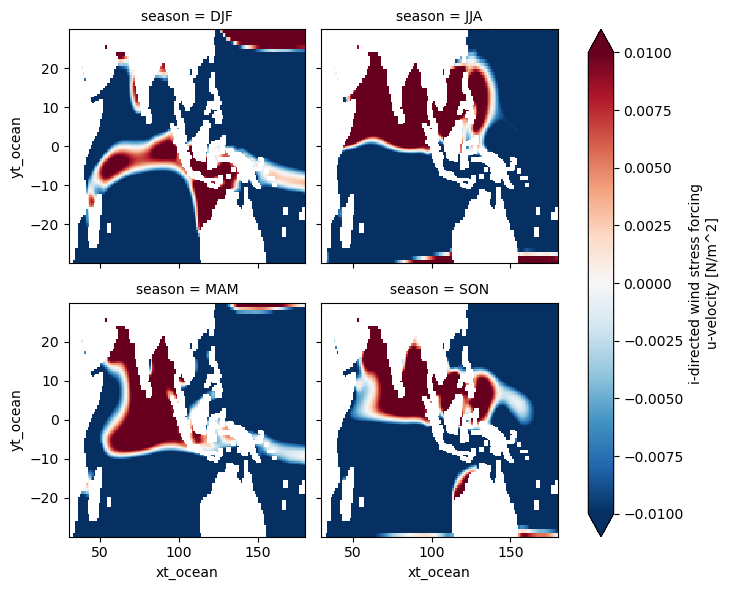

In [87]:
ctrl_u_.groupby('time.season').mean("time").sel(yt_ocean = slice(-30,30), xt_ocean = slice(30,180)).plot(col = "season", col_wrap = 2, vmin = -0.01)

In [53]:
ctrl_U_SST_r[0]

<xarray.DataArray (yt_ocean: 300, xt_ocean: 360)>
array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [-0.10094223, -0.10312811, -0.09809237, ..., -0.07753687,
        -0.08749466, -0.09494118],
       [-0.11196339, -0.12561868, -0.13354907, ..., -0.0665821 ,
        -0.08198847, -0.09702656],
       [-0.130287  , -0.1513819 , -0.16761255, ..., -0.06662526,
        -0.08727754, -0.10815053]])
Coordinates:
    season    <U3 'MAM'
  * xt_ocean  (xt_ocean) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * yt_ocean  (yt_ocean) float64 -77.88 -77.63 -77.38 ... 88.87 89.32 89.77
    geolat_t  (yt_ocean, xt_ocean) float32 -77.88 -77.88 -77.88 ... 88.1 87.88
    geolon_t  (yt_ocean, xt_ocean) float32 0.5 1.5 2.5 3.5 ... 72.32 73.23 73.94
Attributes:
    standard_name:  regression between surface_downward_x_stress and sea_surf...
    units:          N/m^2 / degrees K

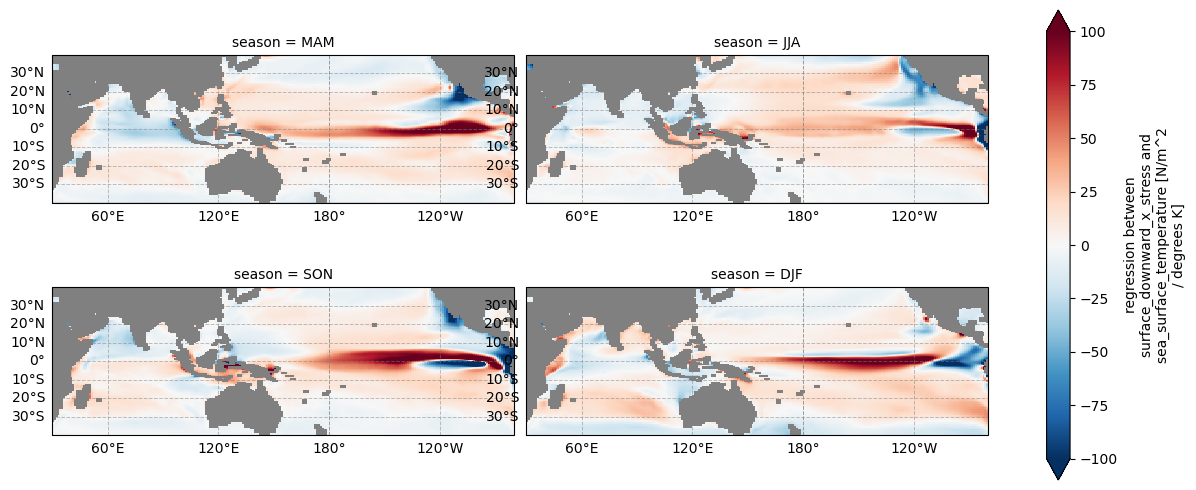

In [71]:
lat_limits = (-40, 40)
lon_limits = (-150, 100)  # Adjust as needed

# Plotting with limits
fg = (ctrl_U_SST_r).plot(figsize = (12,5),
    col="season",
    col_wrap=2,
    vmin=-100,
    transform=ccrs.PlateCarree(),
    subplot_kws={"projection": ccrs.PlateCarree(central_longitude = 180), "xlim": lon_limits, "ylim": lat_limits},
    )
for axes in fg.axs.flat:
    axes.set_facecolor('grey')
    gl = axes.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=0.7, color='gray', alpha=0.5, linestyle='--')

    gl.top_labels = False
    gl.right_labels = False


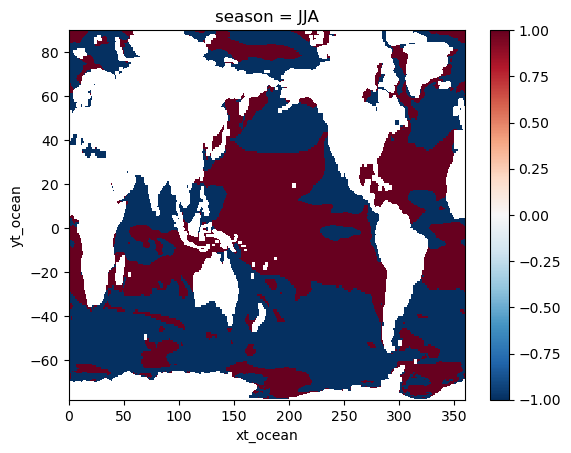

In [66]:
result = xr.where(np.isnan(ctrl_U_SST_r), np.nan, np.where(ctrl_U_SST_r < 0, -1, 1))[1].plot()

In [62]:
def plot_reg(DS, vmin):
    lat_limits = (-15, 15)
    lon_limits = (-100, -60)  # Adjust as needed

    # Plotting with limits
    fg = (DS).plot(figsize = (12,5),
        col="season",
        col_wrap=2,
        vmin=vmin,
        transform=ccrs.PlateCarree(),
        subplot_kws={"projection": ccrs.PlateCarree(central_longitude = 180), "xlim": lon_limits, "ylim": lat_limits},
        )
    for axes in fg.axs.flat:
        axes.set_facecolor('grey')
        gl = axes.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                          linewidth=0.7, color='gray', alpha=0.5, linestyle='--')

        gl.top_labels = False
        gl.right_labels = False
    return fg


In [68]:
ctrl_bin_USST = xr.where(np.isnan(ctrl_U_SST_r), np.nan, np.where(ctrl_U_SST_r < 0, -1, 1))
OC_bin_USST = xr.where(np.isnan(OC_U_SST_r), np.nan, np.where(OC_U_SST_r < 0, -1, 1))
MC_bin_USST = xr.where(np.isnan(MC_U_SST_r), np.nan, np.where(MC_U_SST_r < 0, -1, 1))
VC_bin_USST = xr.where(np.isnan(VC_U_SST_r), np.nan, np.where(VC_U_SST_r < 0, -1, 1))

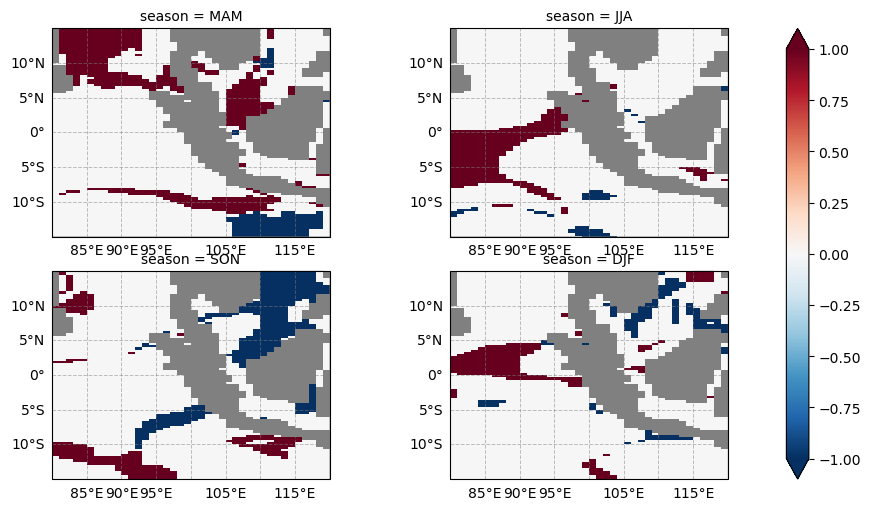

In [74]:
plot_reg(OC_bin_USST-VC_bin_USST, -1)

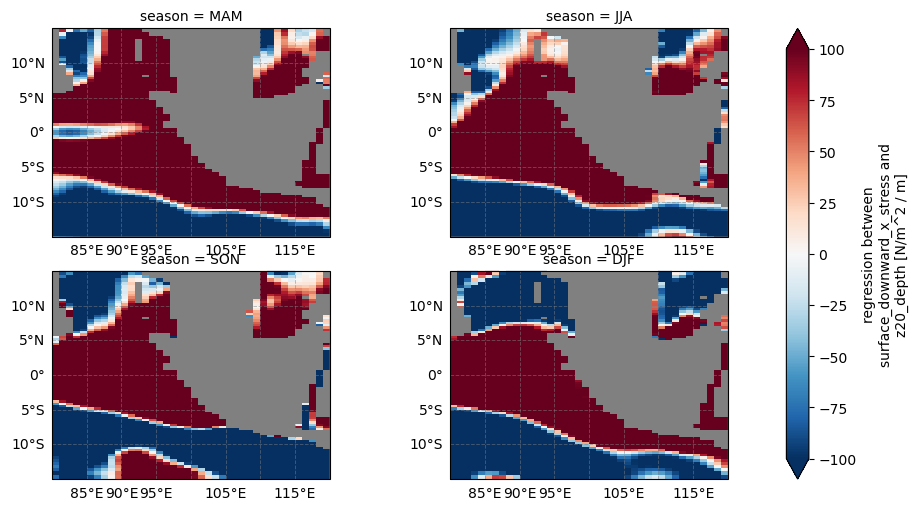

In [174]:
plot_reg(ctrl_U_Z20_r, -100)

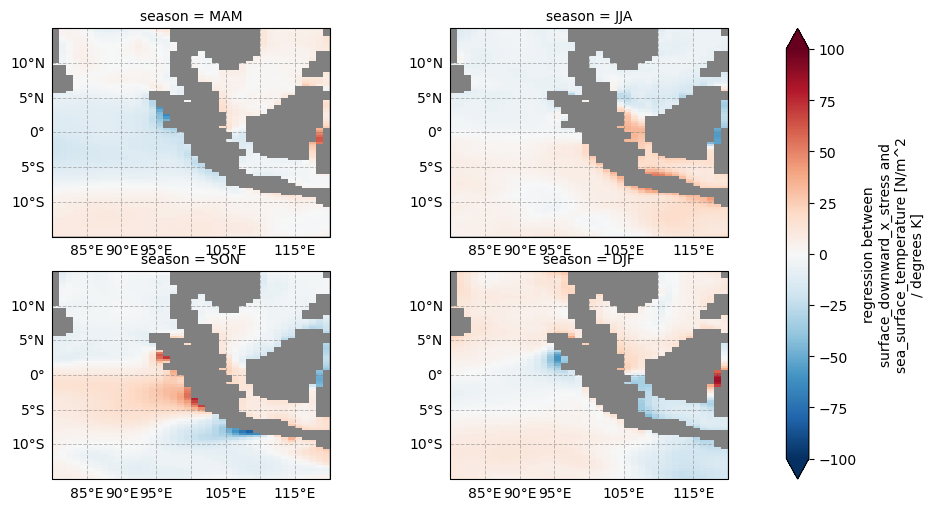

In [78]:
plot_reg(MC_U_SST_r, -100)

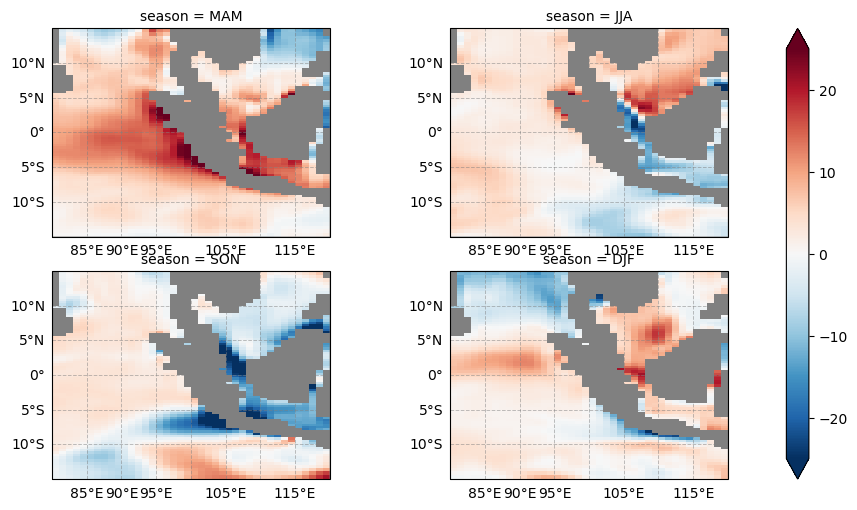

In [198]:
lat_limits = (-15, 15)
lon_limits = (-100, -60)  # Adjust as needed

# Plotting with limits
fg = (MC_U_SST_r - ctrl_U_SST_r).plot(figsize = (12,5),
    col="season",
    col_wrap=2,
    vmin=-25,
    transform=ccrs.PlateCarree(),
    subplot_kws={"projection": ccrs.PlateCarree(central_longitude = 180), "xlim": lon_limits, "ylim": lat_limits},
    )
for axes in fg.axs.flat:
    axes.set_facecolor('grey')
    gl = axes.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=0.7, color='gray', alpha=0.5, linestyle='--')

    gl.top_labels = False
    gl.right_labels = False


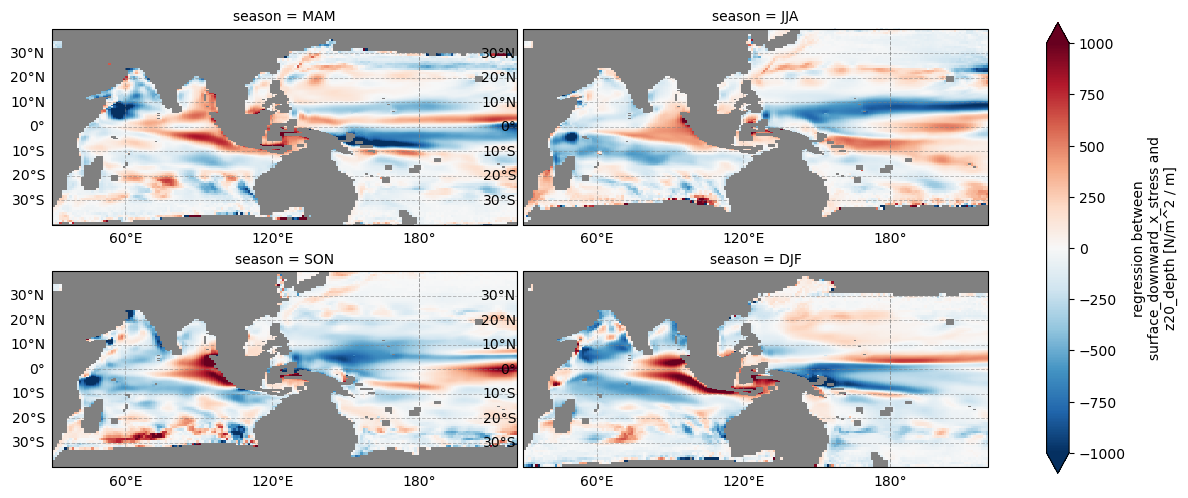

In [73]:
lat_limits = (-40, 40)
lon_limits = (-150, 40)  # Adjust as needed

# Plotting with limits
fg = (ctrl_U_Z20_r).plot(figsize = (12,5),
    col="season",
    col_wrap=2,
    vmin=-1000,
    transform=ccrs.PlateCarree(),
    subplot_kws={"projection": ccrs.PlateCarree(central_longitude = 180), "xlim": lon_limits, "ylim": lat_limits},
    )
for axes in fg.axs.flat:
    axes.set_facecolor('grey')
    gl = axes.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=0.7, color='gray', alpha=0.5, linestyle='--')

    gl.top_labels = False
    gl.right_labels = False

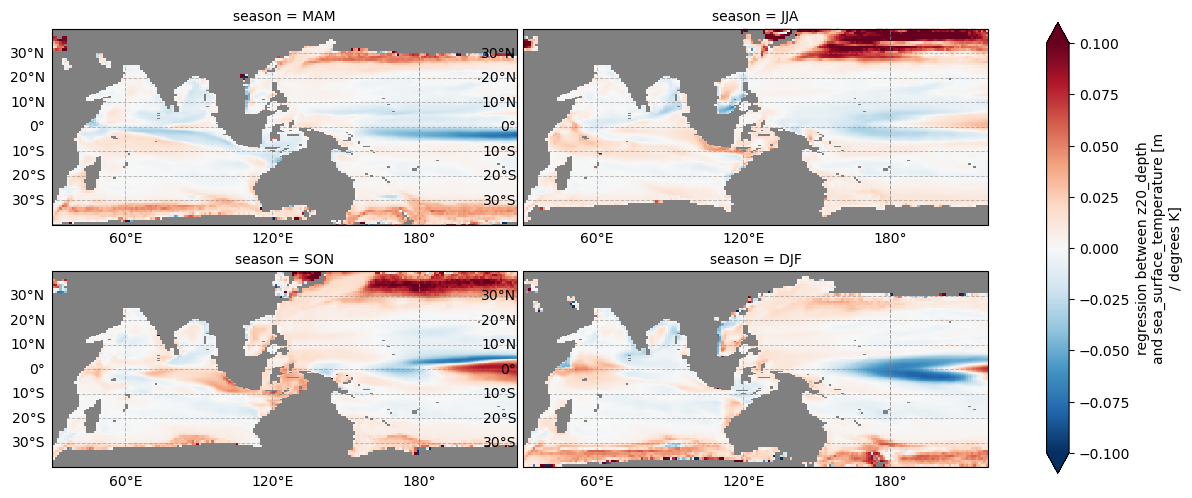

In [74]:
lat_limits = (-40, 40)
lon_limits = (-150, 40)  # Adjust as needed

# Plotting with limits
fg = (ctrl_Z20_SST_r).plot(figsize = (12,5),
    col="season",
    col_wrap=2,
    vmin=-0.100,
    transform=ccrs.PlateCarree(),
    subplot_kws={"projection": ccrs.PlateCarree(central_longitude = 180), "xlim": lon_limits, "ylim": lat_limits},
    )
for axes in fg.axs.flat:
    axes.set_facecolor('grey')
    gl = axes.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=0.7, color='gray', alpha=0.5, linestyle='--')

    gl.top_labels = False
    gl.right_labels = False


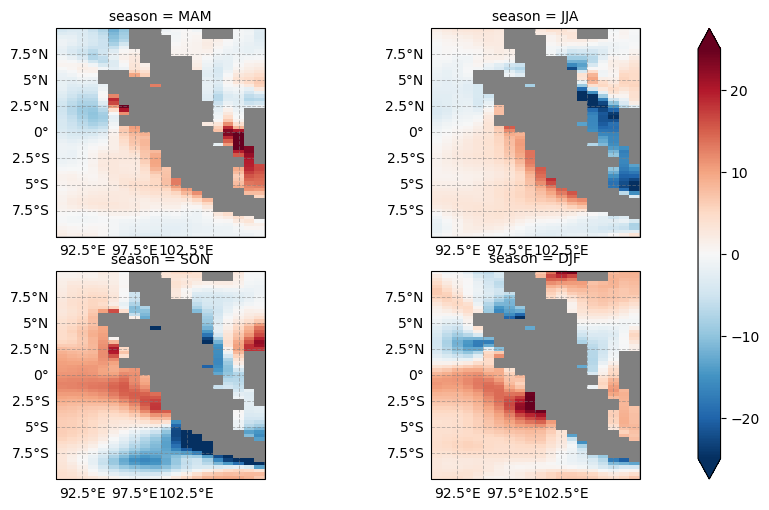

In [77]:
lat_limits = (-10, 10)
lon_limits = (-90, -70)  # Adjust as needed

# Plotting with limits
fg = (VC_U_SST_r - ctrl_U_SST_r).plot(figsize = (12,5),
    col="season",
    col_wrap=2,
    vmin=-25,
    transform=ccrs.PlateCarree(),
    subplot_kws={"projection": ccrs.PlateCarree(central_longitude = 180), "xlim": lon_limits, "ylim": lat_limits},
    )
for axes in fg.axs.flat:
    axes.set_facecolor('grey')
    gl = axes.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=0.7, color='gray', alpha=0.5, linestyle='--')

    gl.top_labels = False
    gl.right_labels = False


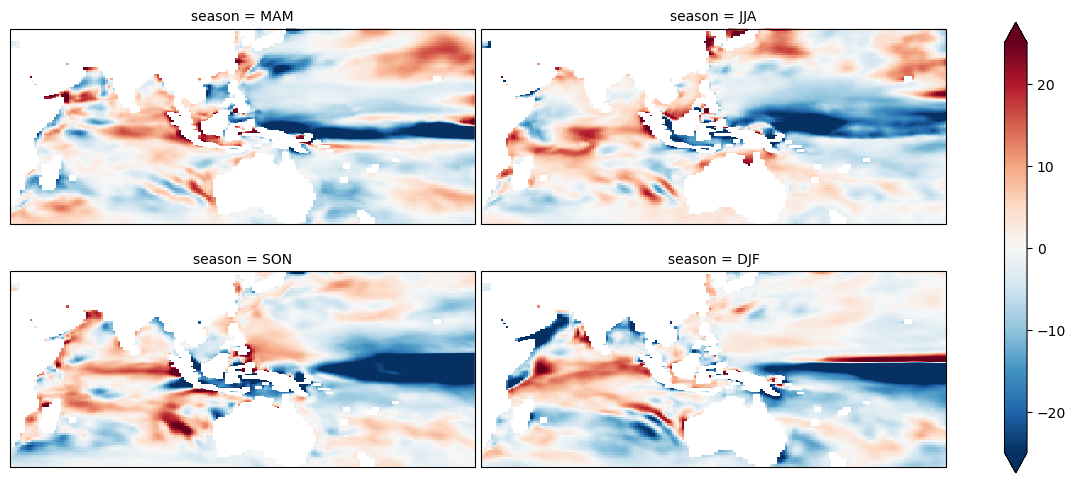

In [67]:
lat_limits = (-40, 40)
lon_limits = (-150, 40)  # Adjust as needed

# Plotting with limits
fg = (OC_U_SST_r - ctrl_U_SST_r).plot(figsize = (12,5),
    col="season",
    col_wrap=2,
    vmin=-25,
    transform=ccrs.PlateCarree(),
    subplot_kws={"projection": ccrs.PlateCarree(central_longitude = 180), "xlim": lon_limits, "ylim": lat_limits},
    )
#fg.axes.set_facecolor('grey')
#gl = fg.axes.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
#                      linewidth=0.7, color='gray', alpha=0.5, linestyle='--')

#gl.top_labels = False
#gl.right_labels = False


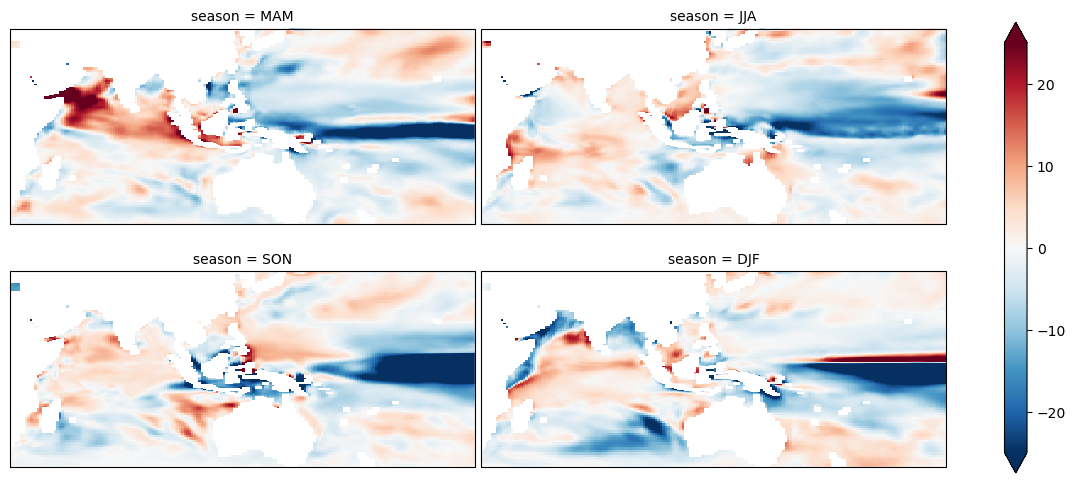

In [68]:
lat_limits = (-40, 40)
lon_limits = (-150, 40)  # Adjust as needed

# Plotting with limits
fg = (MC_U_SST_r - ctrl_U_SST_r).plot(figsize = (12,5),
    col="season",
    col_wrap=2,
    vmin=-25,
    transform=ccrs.PlateCarree(),
    subplot_kws={"projection": ccrs.PlateCarree(central_longitude = 180), "xlim": lon_limits, "ylim": lat_limits},
    )
#fg.axes.set_facecolor('grey')
#gl = fg.axes.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
#                      linewidth=0.7, color='gray', alpha=0.5, linestyle='--')

#gl.top_labels = False
#gl.right_labels = False


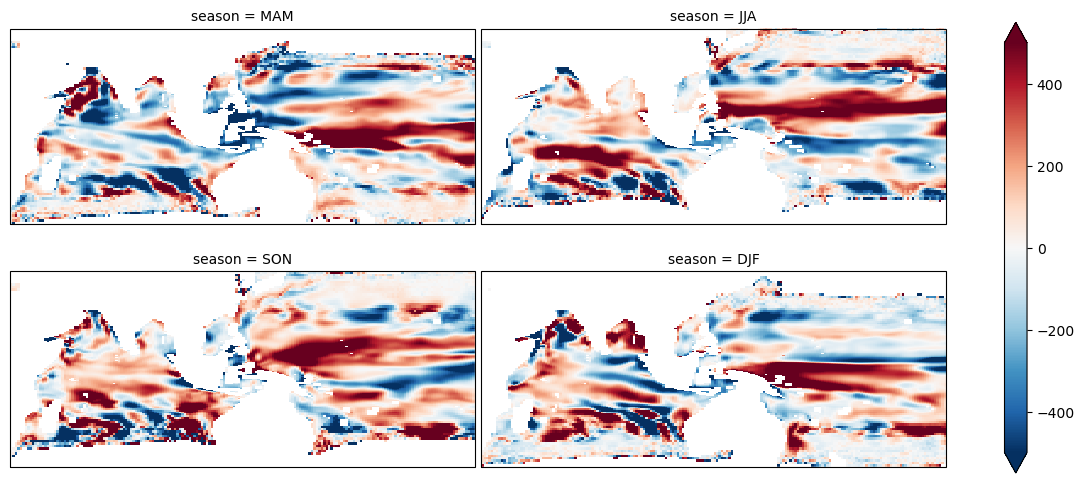

In [69]:
lat_limits = (-40, 40)
lon_limits = (-150, 40)  # Adjust as needed

# Plotting with limits
fg = (OC_U_Z20_r - ctrl_U_Z20_r).plot(figsize = (12,5),
    col="season",
    col_wrap=2,
    vmin=-500,
    transform=ccrs.PlateCarree(),
    subplot_kws={"projection": ccrs.PlateCarree(central_longitude = 180), "xlim": lon_limits, "ylim": lat_limits},
    )
#fg.axes.set_facecolor('grey')
#gl = fg.axes.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
 #                     linewidth=0.7, color='gray', alpha=0.5, linestyle='--')

#gl.top_labels = False
#gl.right_labels = False


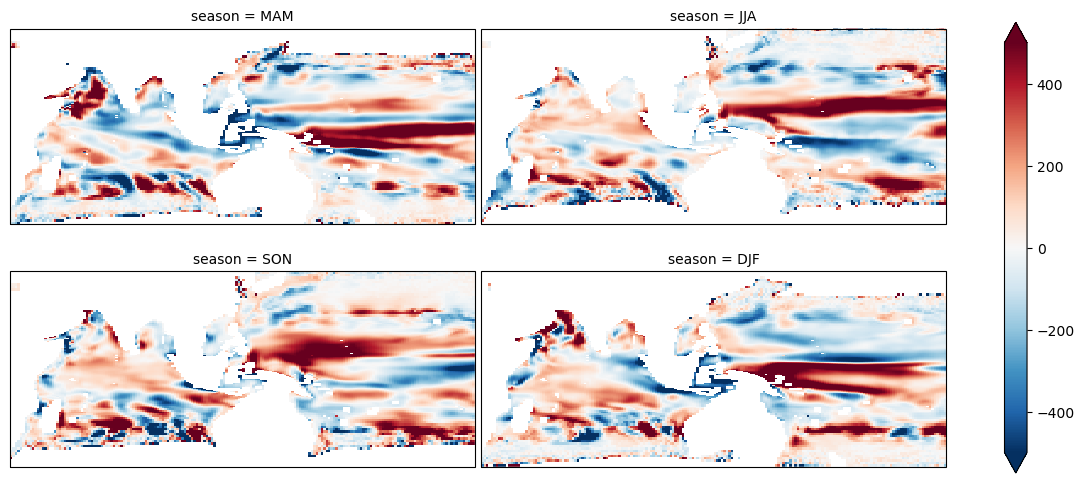

In [70]:
lat_limits = (-40, 40)
lon_limits = (-150, 40)  # Adjust as needed

# Plotting with limits
fg = (MC_U_Z20_r - ctrl_U_Z20_r).plot(figsize = (12,5),
    col="season",
    col_wrap=2,
    vmin=-500,
    transform=ccrs.PlateCarree(),
    subplot_kws={"projection": ccrs.PlateCarree(central_longitude = 180), "xlim": lon_limits, "ylim": lat_limits},
    )
#fg.axes.set_facecolor('grey')
#gl = fg.axes.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
 #                     linewidth=0.7, color='gray', alpha=0.5, linestyle='--')

#gl.top_labels = False
#gl.right_labels = False


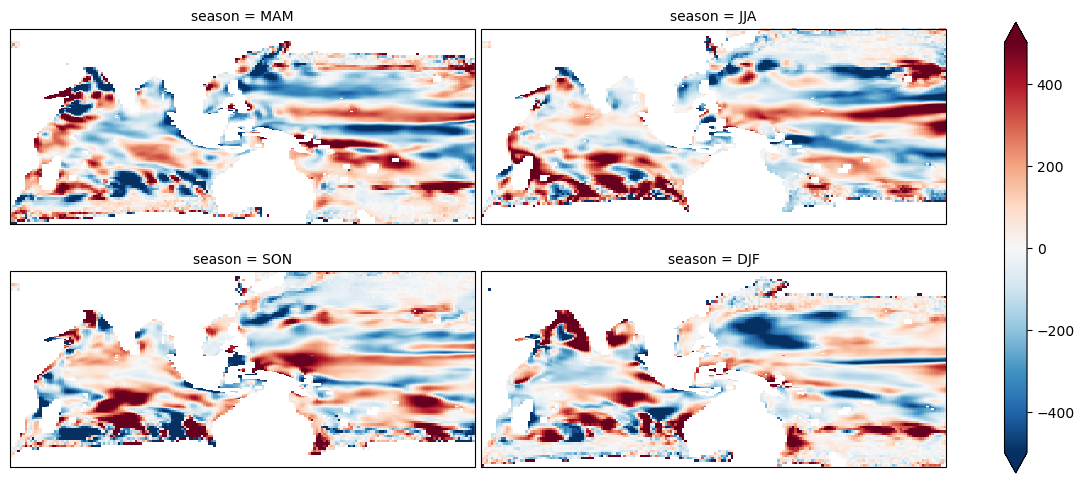

In [71]:
lat_limits = (-40, 40)
lon_limits = (-150, 40)  # Adjust as needed

# Plotting with limits
fg = (VC_U_Z20_r - ctrl_U_Z20_r).plot(figsize = (12,5),
    col="season",
    col_wrap=2,
    vmin=-500,
    transform=ccrs.PlateCarree(),
    subplot_kws={"projection": ccrs.PlateCarree(central_longitude = 180), "xlim": lon_limits, "ylim": lat_limits},
    )
#fg.axes.set_facecolor('grey')
#gl = fg.axes.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
 #                     linewidth=0.7, color='gray', alpha=0.5, linestyle='--')

#gl.top_labels = False
#gl.right_labels = False


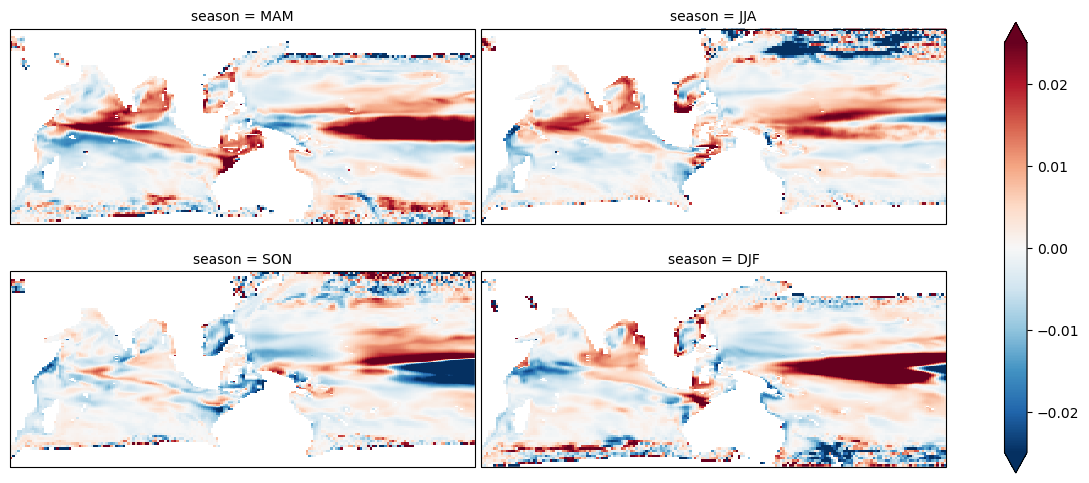

In [64]:
lat_limits = (-40, 40)
lon_limits = (-150, 40)  # Adjust as needed

# Plotting with limits
fg = (MC_Z20_SST_r - ctrl_Z20_SST_r).plot(figsize = (12,5),
    col="season",
    col_wrap=2,
    vmin=-0.025,
    transform=ccrs.PlateCarree(),
    subplot_kws={"projection": ccrs.PlateCarree(central_longitude = 180), "xlim": lon_limits, "ylim": lat_limits},
    )
#fg.axes.set_facecolor('grey')
#gl = fg.axes.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
#                      linewidth=0.7, color='gray', alpha=0.5, linestyle='--')

#gl.top_labels = False
#gl.right_labels = False


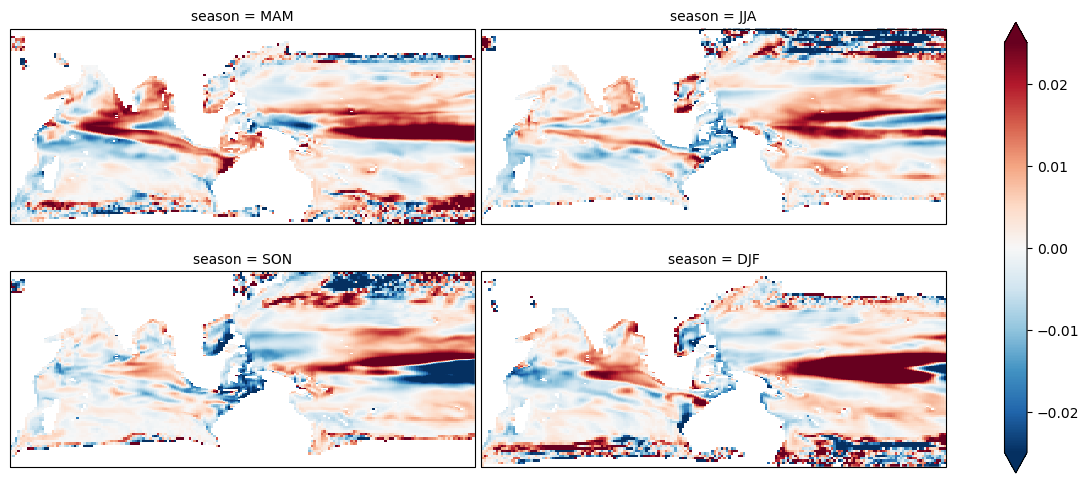

In [63]:
lat_limits = (-40, 40)
lon_limits = (-150, 40)  # Adjust as needed

# Plotting with limits
fg = (OC_Z20_SST_r - ctrl_Z20_SST_r).plot(figsize = (12,5),
    col="season",
    col_wrap=2,
    vmin=-0.025,
    transform=ccrs.PlateCarree(),
    subplot_kws={"projection": ccrs.PlateCarree(central_longitude = 180), "xlim": lon_limits, "ylim": lat_limits},
    )
#fg.axes.set_facecolor('grey')
#gl = fg.axes.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
#                      linewidth=0.7, color='gray', alpha=0.5, linestyle='--')

#gl.top_labels = False
#gl.right_labels = False


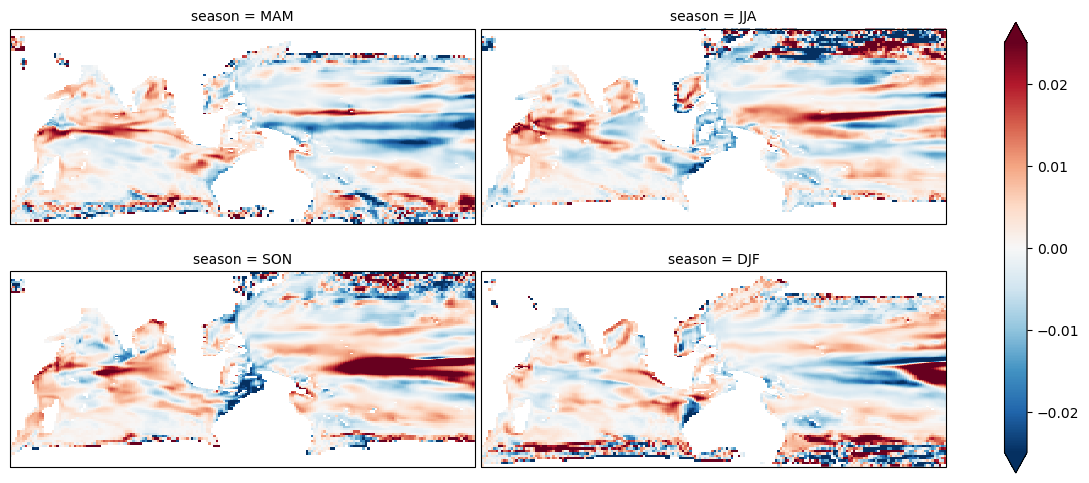

In [48]:
lat_limits = (-40, 40)
lon_limits = (-150, 40)  # Adjust as needed

# Plotting with limits
fg = (VC_Z20_SST_r - ctrl_Z20_SST_r).plot(figsize = (12,5),
    col="season",
    col_wrap=2,
    vmin=-0.025,
    transform=ccrs.PlateCarree(),
    subplot_kws={"projection": ccrs.PlateCarree(central_longitude = 180), "xlim": lon_limits, "ylim": lat_limits},
    )
#fg.axes.set_facecolor('grey')
#gl = fg.axes.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
#                      linewidth=0.7, color='gray', alpha=0.5, linestyle='--')

#gl.top_labels = False
#gl.right_labels = False


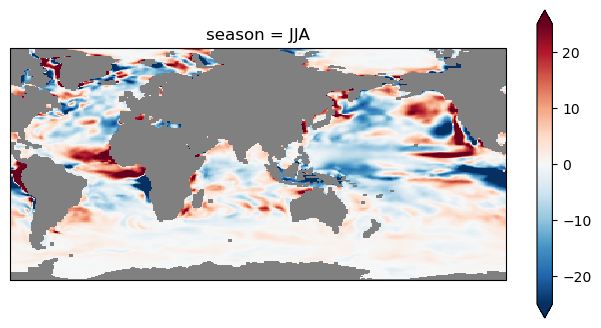

In [50]:
fig, ax = plt.subplots(figsize = (8,4),subplot_kw={'projection': ccrs.PlateCarree(central_longitude=90.0)})
#ax.coastlines()
#ax.set_extent([30, 150, -40, 40], crs=ccrs.PlateCarree())

# Add gridlines
#gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

(regress_season(VC_u_, VC_sst, "JJA") - 
  regress_season(ctrl_u_, ctrl_sst, "JJA")).plot(ax = ax, vmin = -25, transform = ccrs.PlateCarree())
ax.set_facecolor("gray")

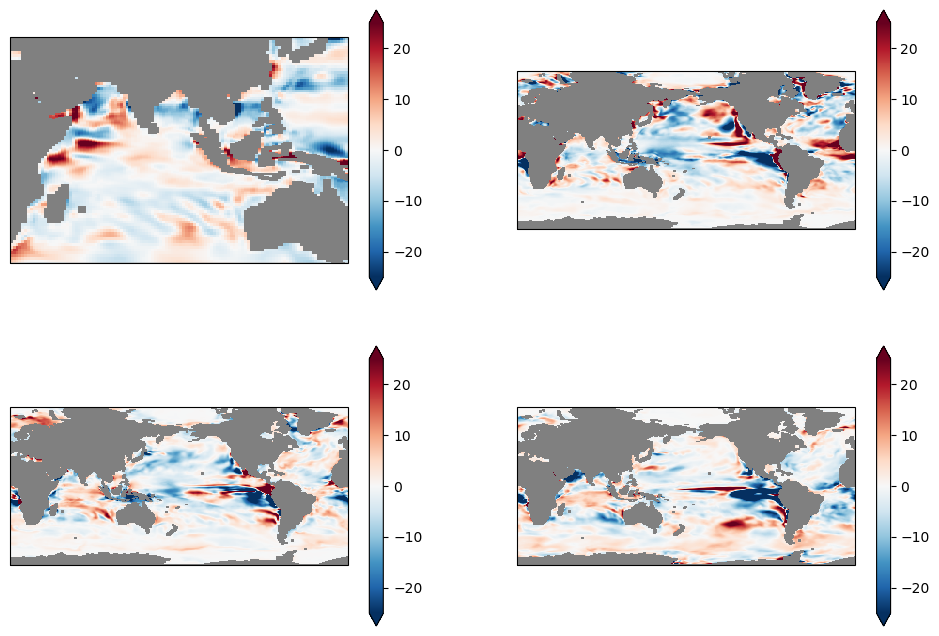

In [42]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot the first subplot
axes[0,0] = plt.subplot(2, 2, 1,  projection=ccrs.PlateCarree(central_longitude=180))
axes[0,0].set_extent([30, 150, -40, 40], crs=ccrs.PlateCarree())
(regress_season(VC_u_, VC_sst, "MAM") - 
  regress_season(ctrl_u_, ctrl_sst, "MAM")).plot(ax = axes[0,0], vmin = -25, transform = ccrs.PlateCarree())
axes[0,0].set_facecolor("gray")

axes[0,1] = plt.subplot(2, 2, 2,  projection=ccrs.PlateCarree(central_longitude=180))
(regress_season(VC_u_, VC_sst, "JJA") - 
  regress_season(ctrl_u_, ctrl_sst, "JJA")).plot(ax = axes[0,1], vmin = -25, transform = ccrs.PlateCarree())
axes[0,1].set_facecolor("gray")

axes[1,0] = plt.subplot(2, 2, 3,  projection=ccrs.PlateCarree(central_longitude=180))
(regress_season(VC_u_, VC_sst, "SON") - 
  regress_season(ctrl_u_, ctrl_sst, "SON")).plot(ax = axes[1,0], vmin = -25, transform = ccrs.PlateCarree())
axes[1,0].set_facecolor("gray")

axes[1,1] = plt.subplot(2, 2, 4,  projection=ccrs.PlateCarree(central_longitude=180))
(regress_season(VC_u_, VC_sst, "DJF") - 
  regress_season(ctrl_u_, ctrl_sst, "DJF")).plot(ax = axes[1,1], vmin = -25, transform = ccrs.PlateCarree())
axes[1,1].set_facecolor("gray")

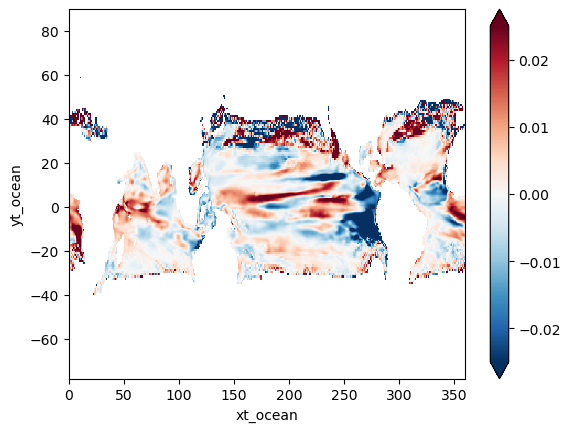

In [26]:
(regress_season(VC_z20, VC_sst, "JJA") - 
  regress_season(ctrl_z20, ctrl_sst, "JJA")).plot(vmin = -0.025)

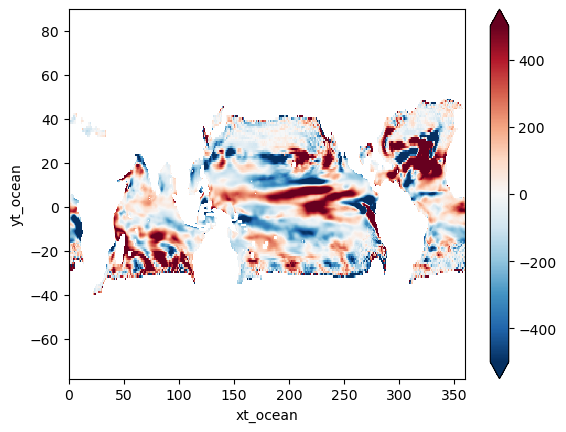

In [27]:
(regress_season(VC_u_, VC_z20, "JJA") - 
  regress_season(ctrl_u_, ctrl_z20, "JJA")).plot(vmin = -500)

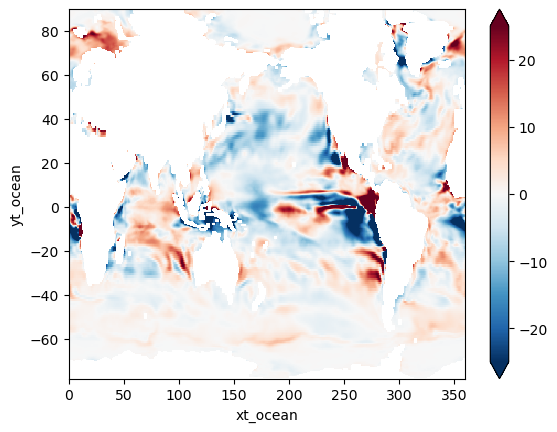

In [105]:
(regress_season(VC_u_, VC_sst, "SON") - 
  regress_season(ctrl_u_, ctrl_sst, "SON")).plot(vmin = -25)

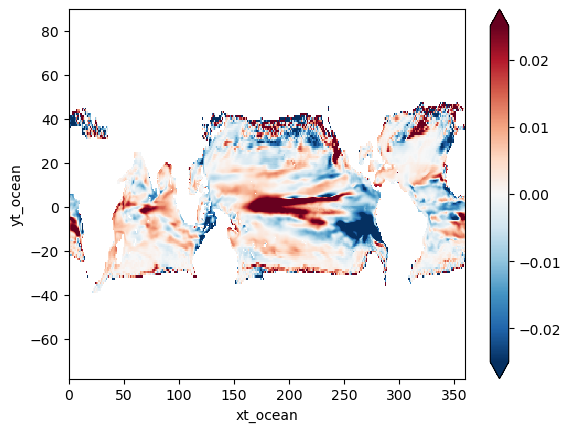

In [104]:
(regress_season(VC_z20, VC_sst, "SON") - 
  regress_season(ctrl_z20, ctrl_sst, "SON")).plot(vmin = -0.025)

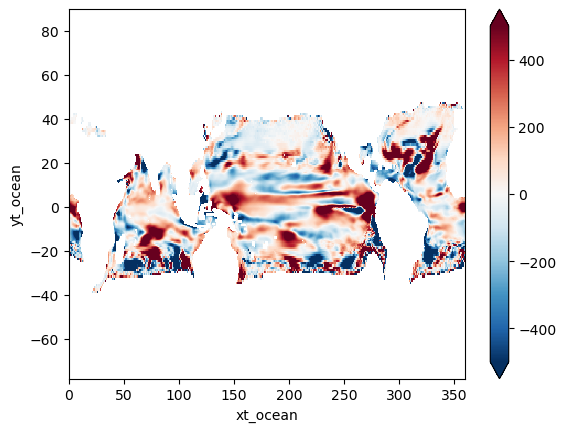

In [106]:
(regress_season(VC_u_, VC_z20, "SON") - 
  regress_season(ctrl_u_, ctrl_z20, "SON")).plot(vmin = -500)

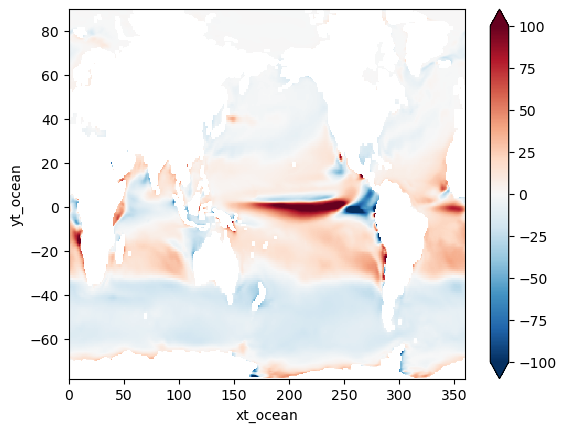

In [94]:
regress_season(ctrl_u_, ctrl_sst, "DJF").plot(vmin = -100)

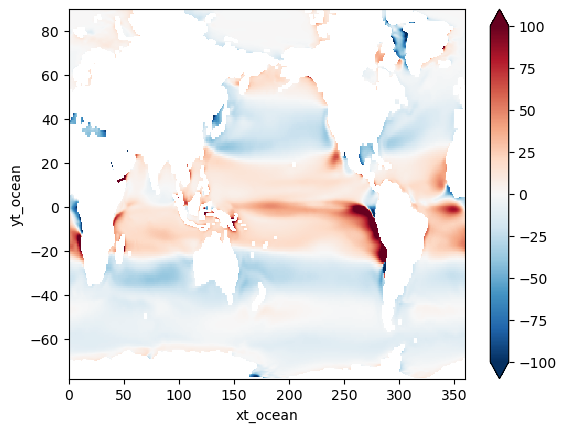

In [30]:
regress(ctrl_u_, ctrl_sst).plot(vmin = -100)

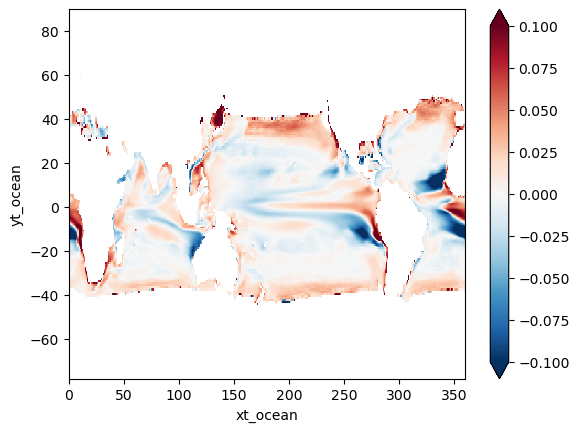

In [31]:
regress(ctrl_z20, ctrl_sst).plot(vmin = -0.1)

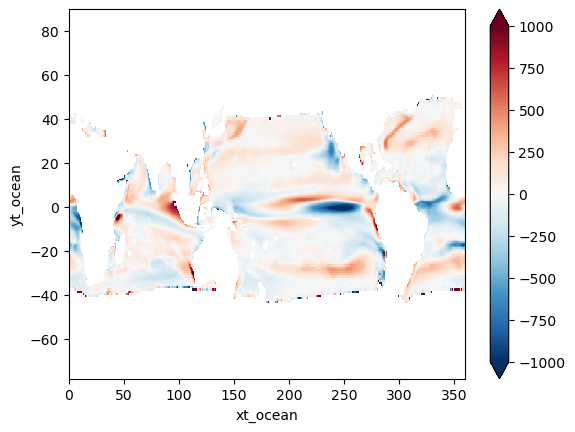

In [32]:
regress(ctrl_u_, ctrl_z20).plot(vmin = -1000)

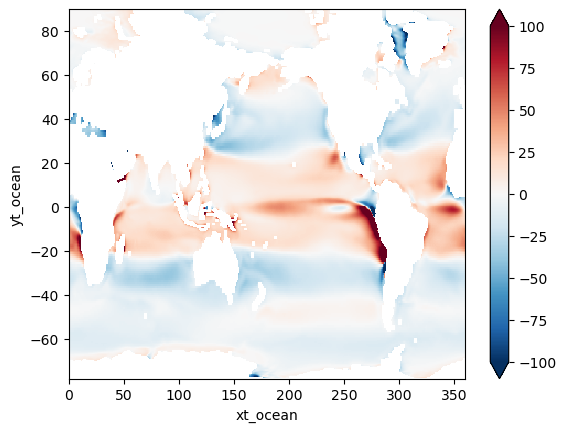

In [35]:
regress(VC_u_, VC_sst).plot(vmin = -100)

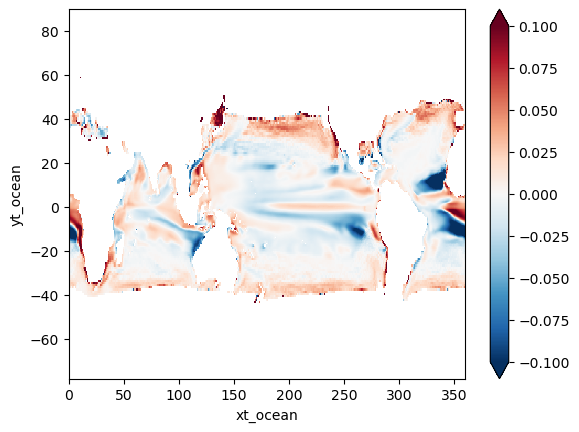

In [33]:
regress(VC_z20, VC_sst).plot(vmin = -0.1)

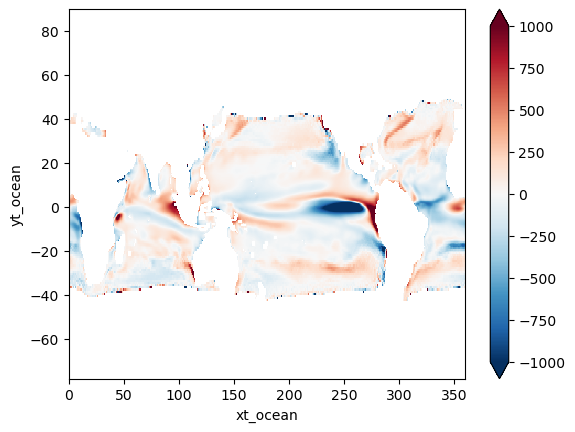

In [34]:
regress(VC_u_, VC_z20).plot(vmin = -1000)

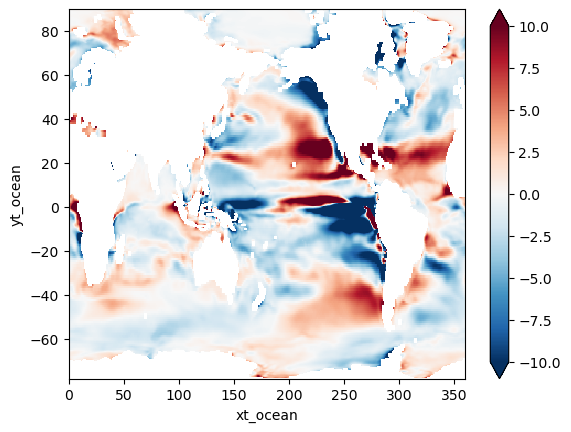

In [42]:
(regress(VC_u_, VC_sst) - regress(ctrl_u_, ctrl_sst)).plot(vmin = -10)

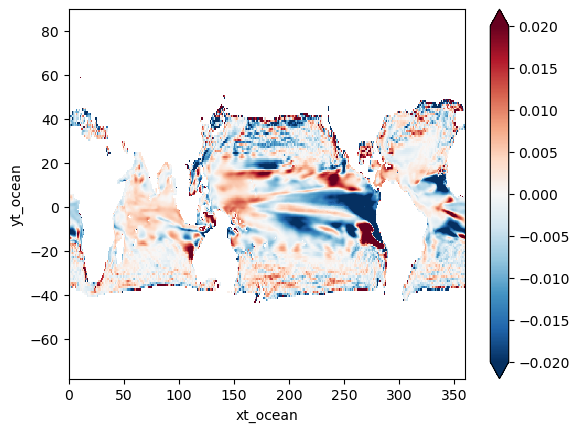

In [44]:
(regress(VC_z20, VC_sst) - regress(ctrl_z20, ctrl_sst)).plot(vmin = -0.02)

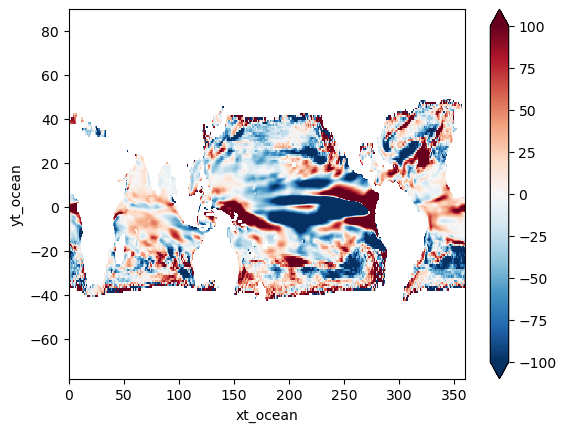

In [41]:
(regress(VC_u_, VC_z20) - regress(ctrl_u_, ctrl_z20)).plot(vmin = -100)

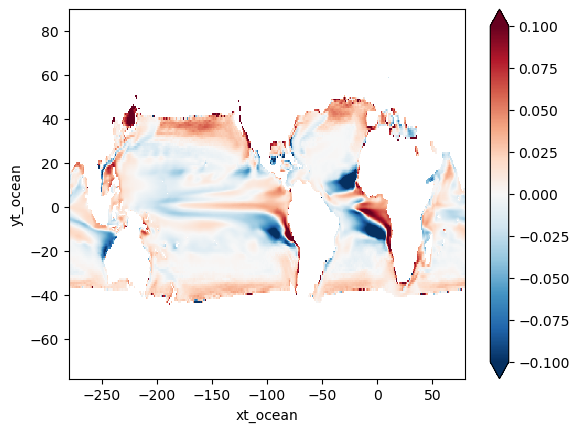

In [36]:
regress(ctrl_z20, ctrl_sst).plot(vmin = -0.1)

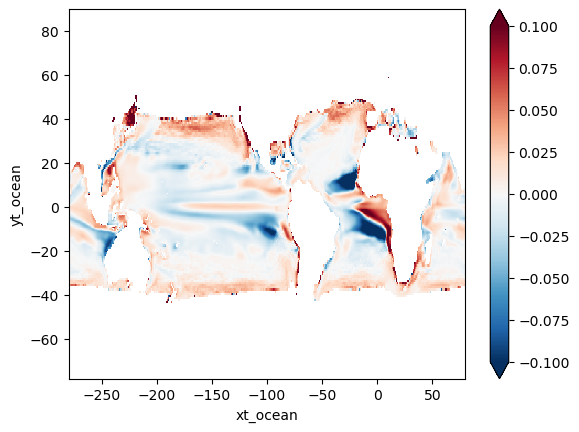

In [37]:
regress(VC_z20, VC_sst).plot(vmin = -0.1)

In [24]:
ctrl_sst_u_r = regress(ctrl_sst, ctrl_u_)

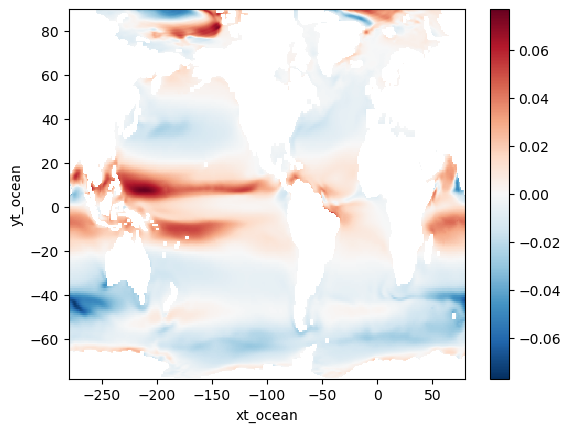

In [107]:
ctrl_sst_u_r.plot()

In [104]:
VC_sst_u_r = regress(VC_sst, VC_u_)

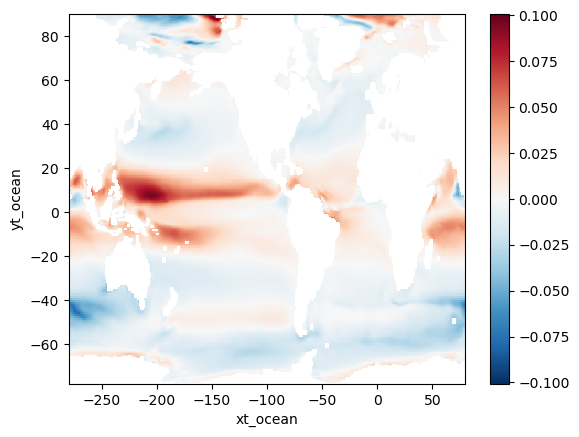

In [105]:
VC_sst_u_r.plot()

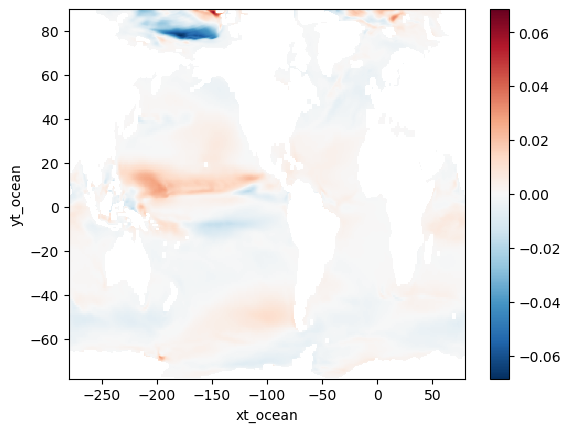

In [108]:
(VC_sst_u_r - ctrL_sst_u_r).plot()

In [49]:
#load in tau
data_dir = "/g/data/e14/sm2435/Exps_ACCESS_initial/"

In [50]:
ctrl_u = xr.open_dataset(data_dir+"ctrl_uwnd.nc", use_cftime=True, chunks= {"time":240})

In [51]:
ctrl_u = ctrl_u.tauu.compute()

In [52]:
ctrl_v = xr.open_dataset(data_dir+"ctrl_vwnd.nc", use_cftime=True, chunks= {"time":240})

In [53]:
ctrl_v = ctrl_v.tauv.compute()

In [54]:
VC_u = xr.open_dataset(data_dir+"var_uwnd.nc", use_cftime=True, chunks= {"time":240})
VC_u = VC_u.tauu.compute()

In [55]:
VC_v = xr.open_dataset(data_dir+"var_vwnd.nc", use_cftime=True, chunks= {"time":240})
VC_v = VC_v.tauv.compute()

In [59]:
def roll_lon_u(df):
    df.coords['xu_ocean'] = (df.coords['xu_ocean']) % 360# - 180
    df = df.sortby(df.xu_ocean)
    return df

In [72]:
def coriolis_param(lat):
    day = (24*60*60)-(4*60)# this is 23hrs 56mins
    om = (2*np.pi)/day
    f = 2*om*np.sin(lat * np.pi / 180)
    return f

def ekman(taux, tauy):
    rho = 1036#kgm^-3
    f = coriolis_param(taux.yu_ocean)
    dtydx = tauy.differentiate('xu_ocean') / (110e3 * np.cos(tauy.yu_ocean * np.pi / 180))
    dtxdy = taux.differentiate('yu_ocean') / (110e3)
    #ek = (1/(rho*f))*(dtydx-dtxdy)
    return (dtydx-dtxdy)



In [60]:
VC_v = roll_lon_u(VC_v)
VC_u = roll_lon_u(VC_u)


In [61]:
ctrl_v = roll_lon_u(ctrl_v)
ctrl_u = roll_lon_u(ctrl_u)


In [73]:
ctrl_ek = ekman(ctrl_u, ctrl_v)

In [74]:
VC_ek = ekman(VC_u, VC_v)

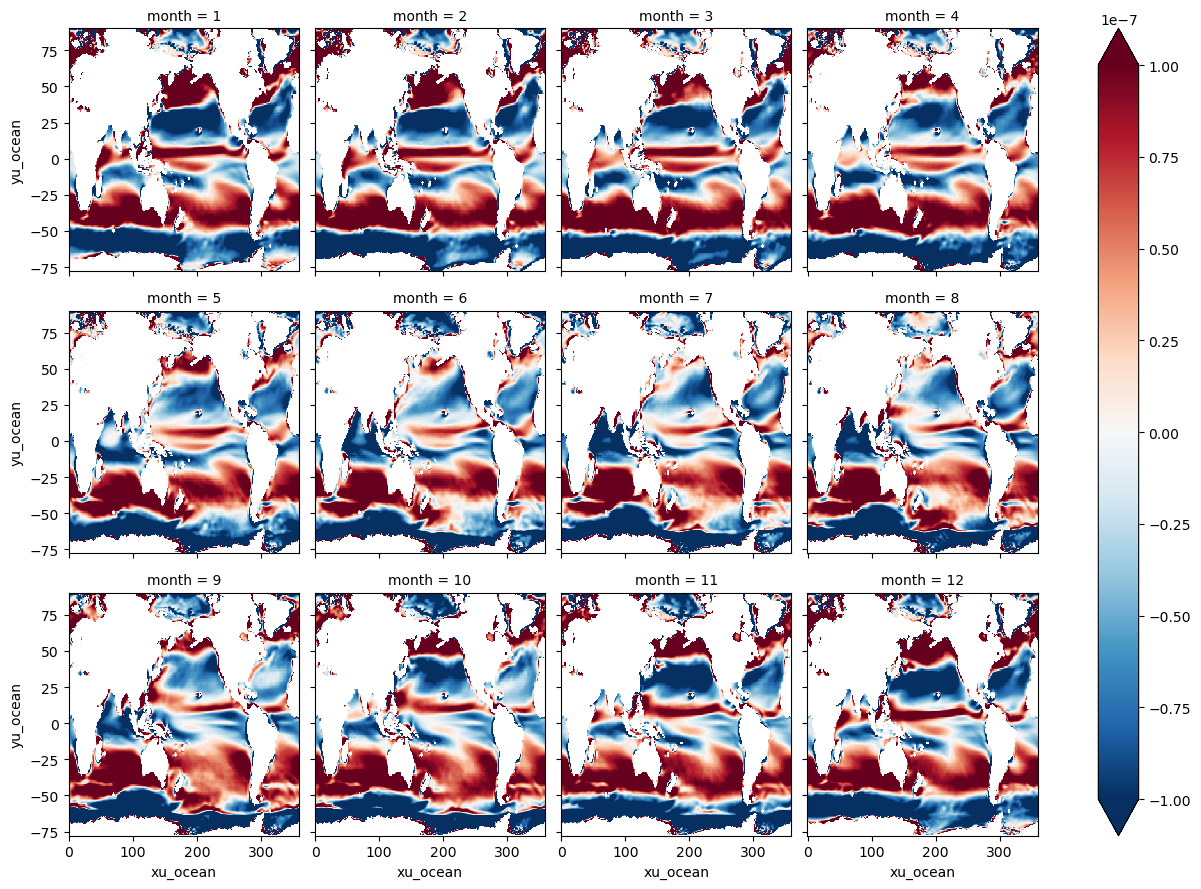

In [83]:
ctrl_ek.groupby("time.month").mean("time").plot(col = "month", col_wrap = 4, vmin = -1e-7)

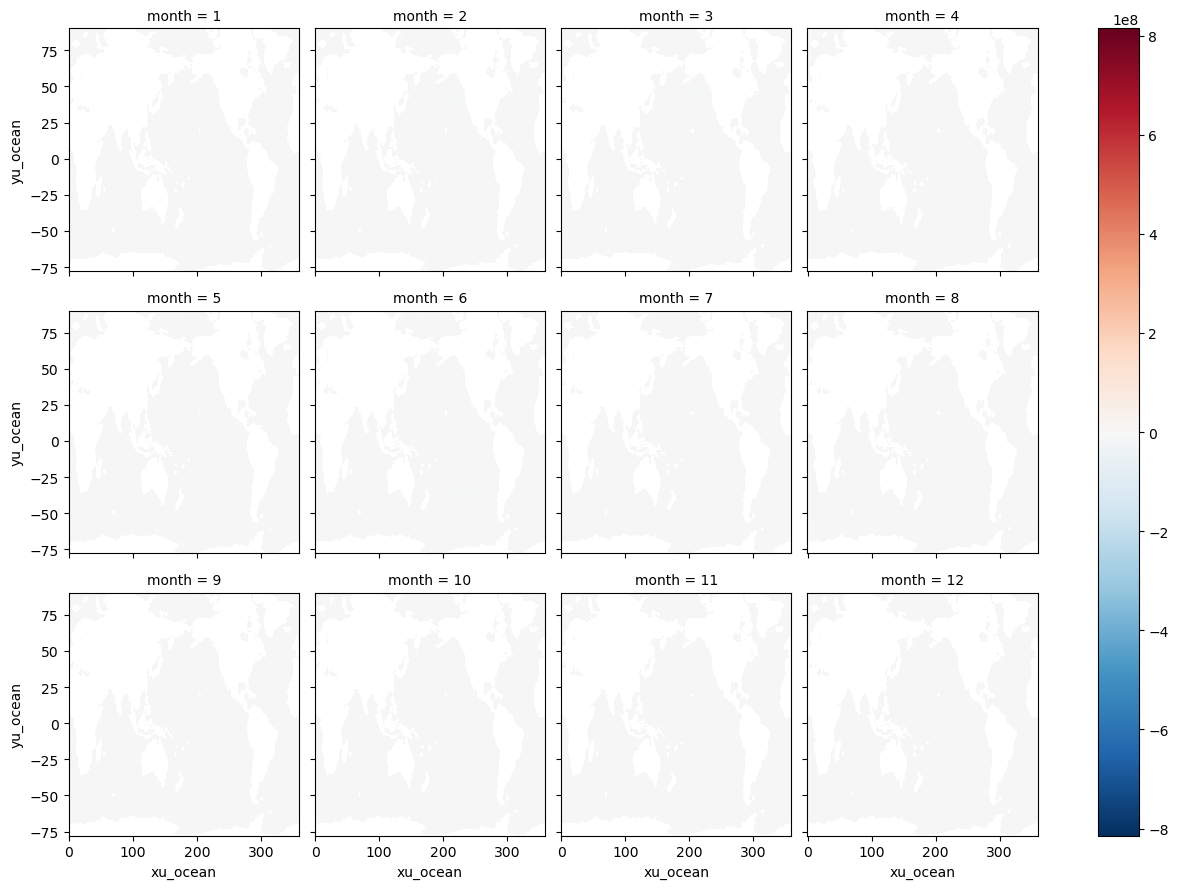

In [76]:
(VC_ek.groupby("time.month").mean("time") - 
 ctrl_ek.groupby("time.month").mean("time")).plot(col = "month", col_wrap = 4)

In [70]:
# Get the coordinates
xt_coords = ctrl_sst['xt_ocean']
yt_coords = ctrl_sst['yt_ocean']

# Initialize an empty DataArray to store the regression coefficients
regression_coefficients = xr.DataArray(
    np.nan,
    dims=('xt_ocean', 'yt_ocean'),
    coords={'xt_ocean': xt_coords, 'yt_ocean': yt_coords},
)

In [80]:
def linear_trend(x, y):
    # Check for NaN values and skip them
    valid = ~np.isnan(x) & ~np.isnan(y)
    if valid.sum() < 2:
        return np.nan
    else:
        pf = np.polyfit(x[valid], y[valid], 1)
        return pf[0]

In [81]:
# Loop over each grid cell and calculate the regression coefficient
for i, xt in enumerate(xt_coords):
    for j, yt in enumerate(yt_coords):
        sst_cell = ctrl_sst.sel(xt_ocean=xt, yt_ocean=yt).values
        tauu_cell = ctrl_u_.sel(xt_ocean=xt, yt_ocean=yt).values
        regression_coefficients[i, j] = linear_trend(sst_cell, tauu_cell)


KeyboardInterrupt: 

In [83]:
regression_coefficients

<xarray.DataArray 'sst' (time: 2400, yt_ocean: 300, xt_ocean: 360)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * xt_ocean  (xt_ocean) float64 -279.5 -278.5 -277.5 -276.5 ... 77.5 78.5 79.5
  * yt_ocean  (yt_ocean) float64 -77.88 -77.63 -77.38 ... 88.87 89.32 89.77
  * time      (time) object 0951-01-16 12:00:00 ... 1150-12-16 12:00:00
    geolat_t  (yt_ocean, xt_ocean) float32 -77.88 -77.88 -77.88 ... 65.63 65.21
    geolon_t  (yt_ocean, xt_ocean) float32 -279.5 -278.5 -277.5 ... 79.97 79.99
Attributes:
    long_name:      Potential temperature
    units:          degrees K
    valid_range:    [-10. 500.]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    standard_name:  sea_surface_temperature